# Step-by-step tutorial for analyzing the synthetic data generated by MC-TimeGAN for time series to calculate power flow and grid congestion metrics in the Toygrid, SimBench Grid, and Single Feeder Grid

This tutorial facilitates power flow time series calculations using various grid models, including Toygrid, SimBench Grid, and Single Feeder Grid, within a Jupyter Notebook environment.
The tutorial will guide you through reading original data, generating their original and modified labels, and then integrating synthetic data with the modified data. The evaluation includes t-distributed Stochastic Neighbor Embedding (t-SNE) and Principal Component Analysis (PCA), power flow calculations, Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) evaluations, and Power Spectral Density (PSD) analysis of both the original and MC-TimeGAN generated data.

Before running the notebook, please install the necessary packages using the following command:
```sh
pip install -r requirements.txt
```
Make sure the requirements.txt file contains all the dependencies required for the notebook.


In [1]:
# Import essential Python standard libraries
import os

# Import numerical and scientific libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

# Import additional Matplotlib tools
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

# Import SimBench for standardized benchmark networks and load profiles
import simbench as sb

# Custom library imports
from helper.evaluation_processing import Evaluation
from helper.label_processing import TimeSeriesSimulator 
from helper.grid_manager import GridManager

/home/iai/ii6824/.local/lib/python3.9/site-packages/networkx/utils/backends.py:132: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends = _get_backends("networkx.plugins")
/home/iai/ii6824/.local/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [2]:
# Create an instance of the Evaluation class
eval = Evaluation()
# Create an instance of the GridManager class
sb_code='1-LV-rural1--2-sw'
ts_sim = TimeSeriesSimulator(sb_code=sb_code, days=7)
# Create an instance of the GridManager class
grid_manager = GridManager()

#  Set the random seed '58'
np.random.seed(58)

/home/iai/ii6824/.local/lib/python3.9/site-packages/simbench/converter/csv_data_manipulation.py:55: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  csv_data["Node"].type.loc[idx_nodes_dupl_sw] = new_type_name
/home/iai/ii6824/.local/lib/python

### TimeSeriesSimulator Class Description

The `TimeSeriesSimulator` class is designed to simulate and analyze time series profiles for electrical networks using the SimBench data and pandapower library. This class provides a structured and modular approach to loading the network, preparing profiles, running power flow simulations, and visualizing the results.

#### Key Methods and Their Functions:

- **`__init__(self, sb_code, days)`**: 
  - Initializes the ts_sim with a SimBench code and the number of days for the simulation.
  - Loads the network and sets up the time steps for the simulation.

- **`load_net(self, sb_code)`**: 
  - Loads the SimBench network based on the provided code.
  - Asserts that all necessary profiles are available.

- **`apply_absolute_values(self, absolute_values_dict, case_or_time_step)`**: 
  - Assigns absolute values from the profiles dictionary to the network elements for a specific time step.

- **`prepare_profiles(self)`**: 
  - Retrieves and prepares the absolute profiles required for the simulation.

- **`run_power_flow(self, profiles)`**: 
  - Runs the power flow simulations for each time step and stores the results in a DataFrame.
  - Adjusts transformer tap positions to avoid voltage violations.

- **`plot_profiles(self, results, profiles)`**: 
  - Visualizes the load sum result and grid profiles over the simulation period.
  - Plots the voltage extrema to analyze voltage stability.

- **`plot_profile(self, data, title)`**: 
  - Plots the provided data with a given title for visual exploration.

- **`run(self)`**: 
  - Executes the complete simulation process, including preparing profiles, running power flow simulations, and visualizing the results.
  - Collects and plots data at PV buses for further analysis.

This class simplifies the process of simulating and analyzing electrical networks by encapsulating all necessary steps into a well-organized and reusable structure.

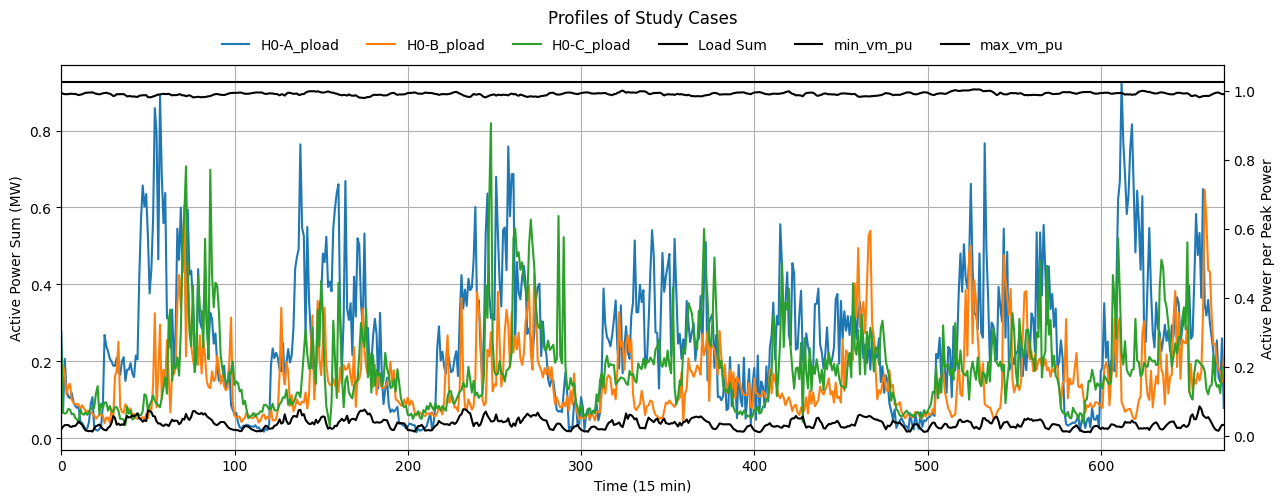

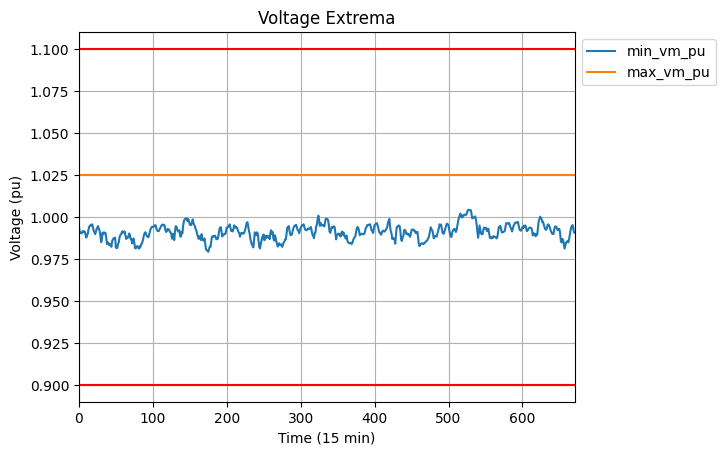

Data collection completed.


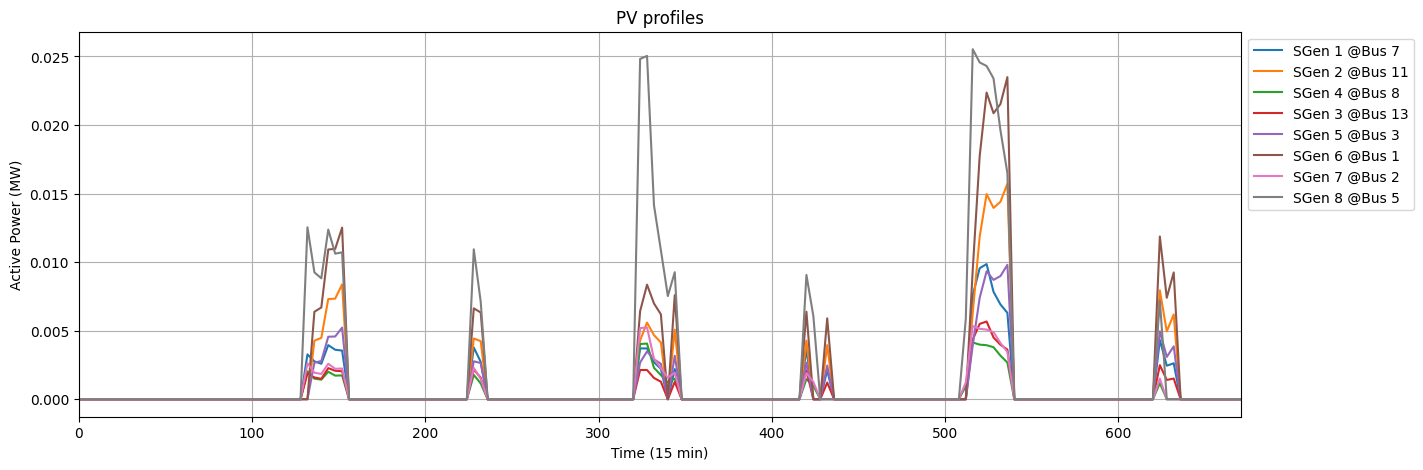

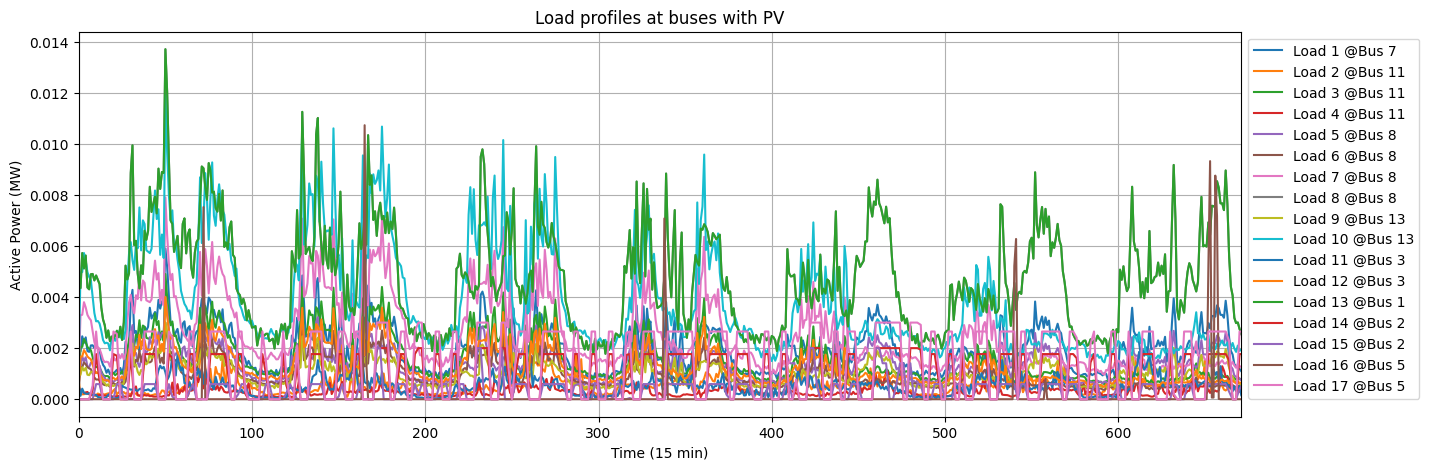

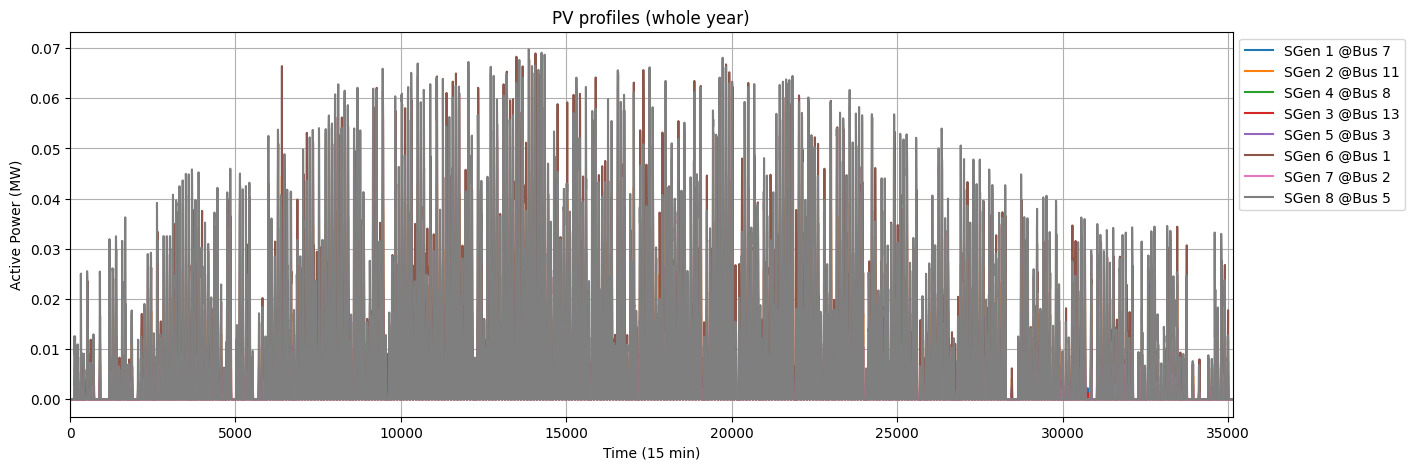

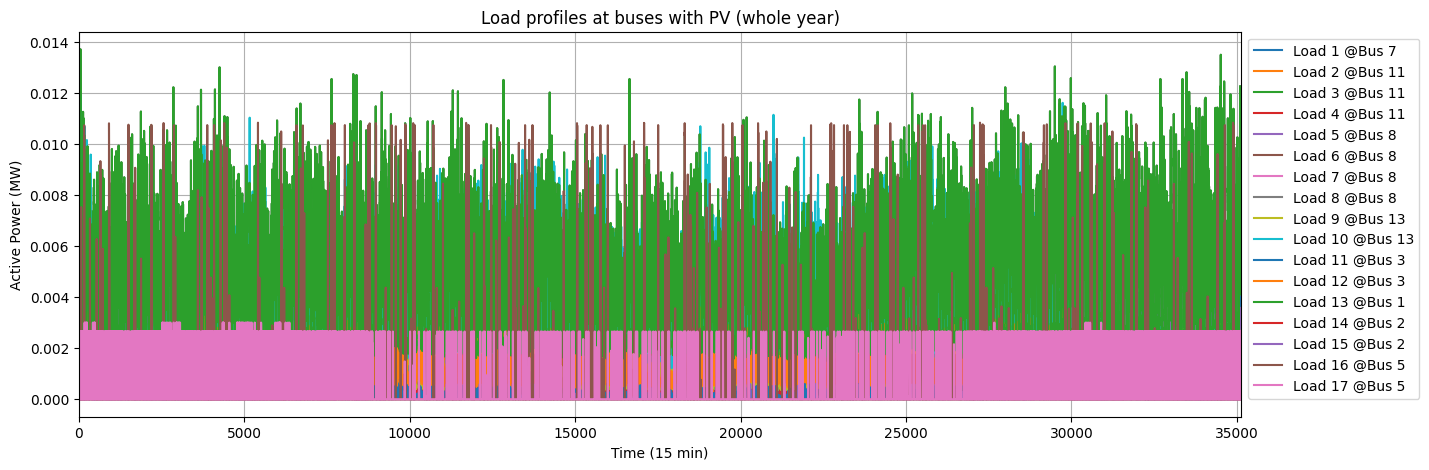

In [3]:
ts_sim.run_analysis()

Binary labels for load active power


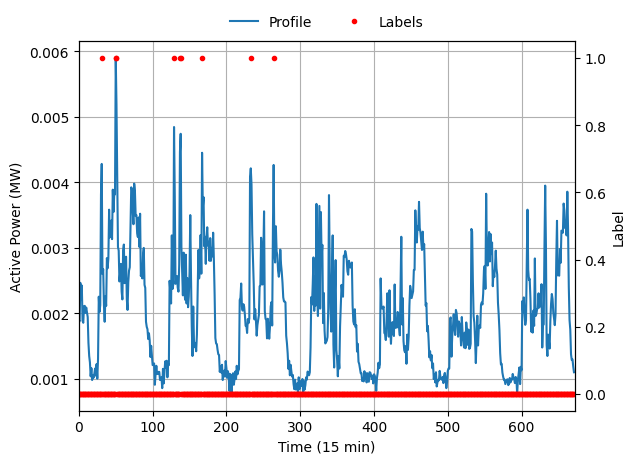

Binary labels for sgen active power


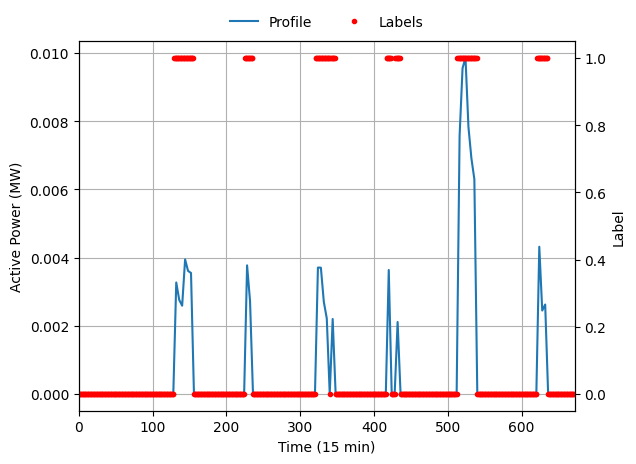

Three sigma labels for load active power


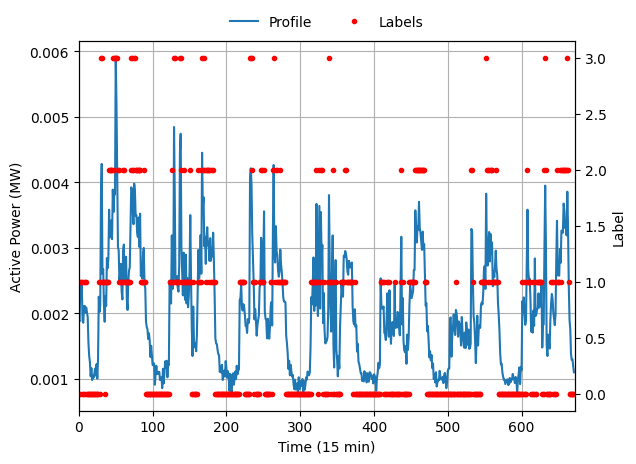

Five sigma labels for load active power


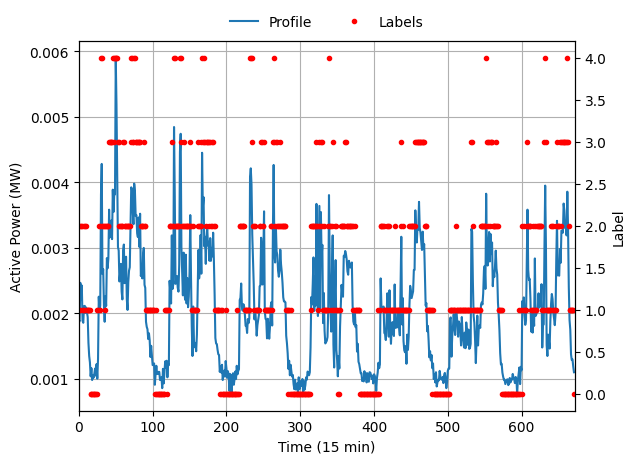

Discretized labels for load active power


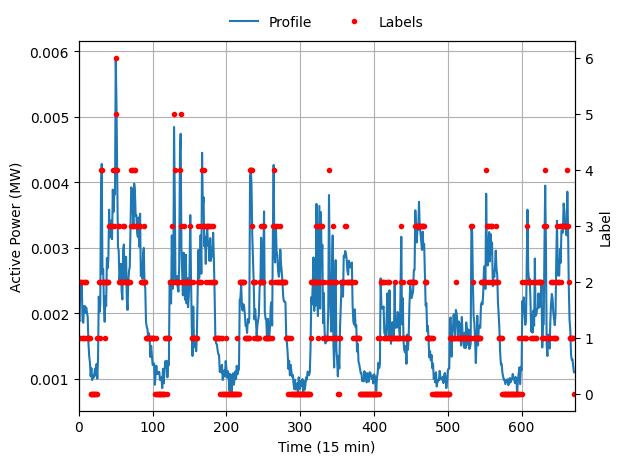

Discretized labels for sgen active power


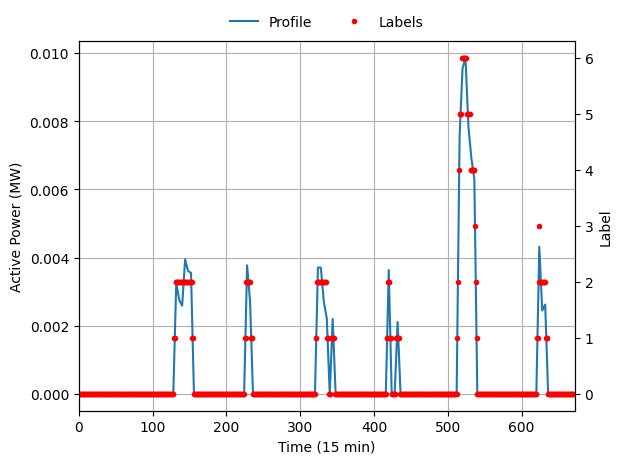

Season labels for sgen active power (Months)


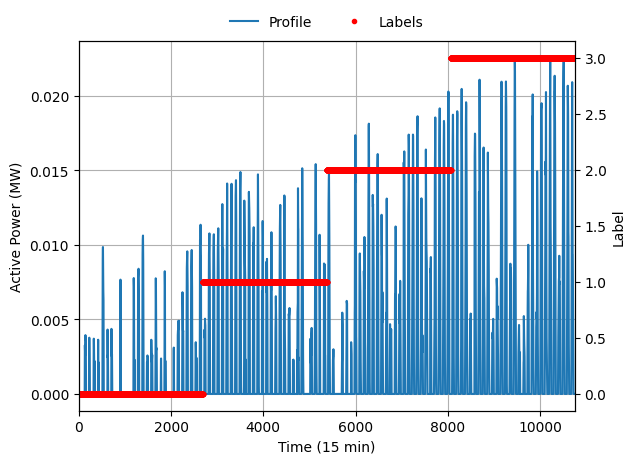

Season magnitude labels for sgen active power


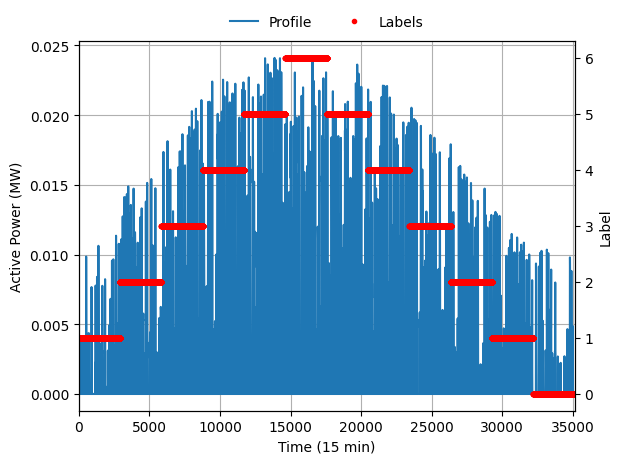

In [4]:
ts_sim.run_label_prepare_process()


### **Label Modification**

The following code demonstrates two approaches for label modification: Peak Spreading and Peak Elevation.

```python
ts_sim.run_peak_spread_label()
ts_sim.run_elevated_label()
```

#### **1st - Peak Spreading Approach**

- Uses the highest ordinal label value as the target.
- Spreads profile peaks by adopting the target label when adjacent.

#### **2nd - Peak Elevation Approach**

- Elevates profile peaks uniformly.
- Moves labels to the next higher bin based on neighborhood criteria.
- Increments the ordinal label if the ratio of the mean of neighboring labels to the class mean exceeds a threshold.
- Considers a specific number of preceding and succeeding data points for adjacency.

| Load 1 @Bus 7   |   0 |   1 |   2 |   3 |   4 |
|:----------------|----:|----:|----:|----:|----:|
| Before          | 151 | 210 | 195 |  90 |  26 |
| After           | 151 | 203 | 174 |  66 |  78 | 



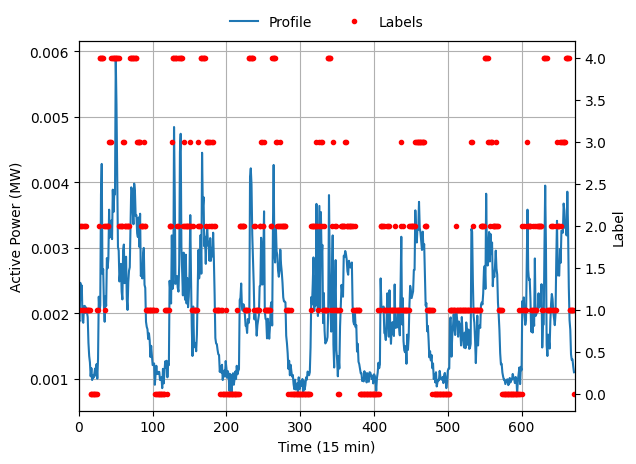

| Load 1 @Bus 7   |   0 |   1 |   2 |   3 |   4 |
|:----------------|----:|----:|----:|----:|----:|
| Before          | 151 | 210 | 195 |  90 |  26 |
| After           | 151 | 203 | 174 |  66 |  78 | 

| SGen 1 @Bus 7   |   1 |   2 |   3 |   4 |
|:----------------|----:|----:|----:|----:|
| Before          | 557 |  35 |  56 |  24 |
| After           | 557 |  32 |  51 |  32 | 

| Load 1 @Bus 7   |   0 |   1 |   2 |   3 |   4 |
|:----------------|----:|----:|----:|----:|----:|
| Before          | 151 | 210 | 195 |  90 |  26 |
| After           | 120 | 198 | 209 | 109 |  36 | 



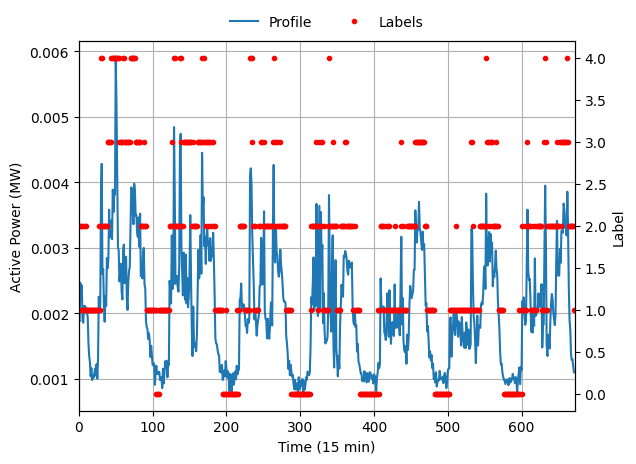

| Load 1 @Bus 7   |   0 |   1 |   2 |   3 |   4 |
|:----------------|----:|----:|----:|----:|----:|
| Before          | 151 | 210 | 195 |  90 |  26 |
| After           | 120 | 198 | 209 | 109 |  36 | 



In [5]:
ts_sim.run_peak_spread_label()
#peak_spreading_approach 
_ = ts_sim.label_processor.peak_spreading_approach(df=ts_sim.label_processor.five_sigma_labels(ts_sim.load_active_power_data.iloc[ts_sim.time_steps,[0]]), 
                                                      no_neighbors=2)
_ = ts_sim.label_processor.peak_spreading_approach(df=ts_sim.label_processor.five_sigma_labels(ts_sim.sgen_active_power_data.iloc[ts_sim.time_steps,[0]]), 
                                                      no_neighbors=2)
ts_sim.run_elevated_label()
_ = ts_sim.label_processor.peak_elevation_approach(df=ts_sim.label_processor.five_sigma_labels(ts_sim.load_active_power_data.iloc[ts_sim.time_steps,[0]]),
                                                       no_neighbors=20, 
                                                       threshold=1.25)

# **ToyGrid Simulation**
This script facilitates the creation, simulation, and visualization of a simple grid topology using the `pandapower` library. Below is an overview of the main functions used in the ToyGrid simulation.

### Functions Overview

- **`create_grid`**: Creates a simple grid topology that accommodates the provided load and PV profiles.
- **`correct_bus_names`**: Corrects the bus names to ensure consistency.
- **`fix_bus_names`**: Fixes bus names in a list.
- **`plot_annotated_grid`**: Plots the grid with annotated bus names.
- **`datasource`**: Converts input feed data into a data source suitable for simulation.
- **`create_controllers`**: Creates controllers for grid elements.
- **`create_output_writer`**: Creates an output writer to log simulation results.
- **`plot_results`**: Plots the results of the simulation.
- **`time_series`**: Runs a time-series simulation for the grid.
- **`display_compact_dataframes`**: Displays compact views of DataFrames.
- **`read_and_plot_xlsx_files`**: Reads and plots results from Excel files.

### Usage Example

- **1.Create a Grid:**
    ```python
    # 1.a Create a dictionary of load and sgen active power data for the first 500 samples
    inputdict = {
        'load': [(data, f'load {name}') for name, data in ts_sim.load_active_power_data.iloc[range(500), [0, 1, 2]].items()],
        'sgen': [(data, f'sgen {name}') for name, data in ts_sim.sgen_active_power_data.iloc[range(500), [0, 1]].items()]
    }
    # 1b. Define the output directory for generated files
    output_dir = os.path.join('helper', 'output','toygrid')

    # 1c. Create a toy grid with specified parameters
    toy_grid = create_grid('ToyGrid', 0.4, 10.0, 0.05, inputdict_raw, mode='row')
    ```

- **2.Run a Time-Series Simulation:**
    ```python
    # Run a Time-Series Simulation: 
    ow = time_series(inputfeed=inputdict, output_dir=output_dir, grid=toy_grid)
    ```

- **3.Read and Plot Results:**
    ```python
    # Read and Plot Results
    dataframes = read_and_plot_xlsx_files(output_dir)
    ```

This structured approach helps in creating, simulating, and analyzing simple grid topologies using `pandapower`.

The output will be saved in the specified `output_dir` for the ToyGrid environment with 3 loads and 2 PV installations. The grid topology will also be plotted as follows.

/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/timeseries/output_writer.py:177: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
      dtype='int64', length=500)' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  self.output["Parameters"].loc[:, "time_step"] = self.time_steps
/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/control/run_control.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  level = controller.level.fillna(0).apply(asarray).values
100%|██████████| 500/500 [00:03<00:00, 162.62it/s]
No or insu

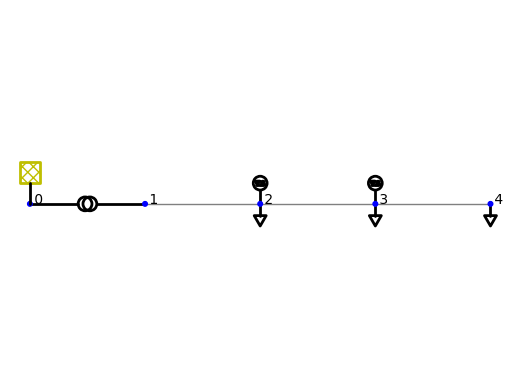

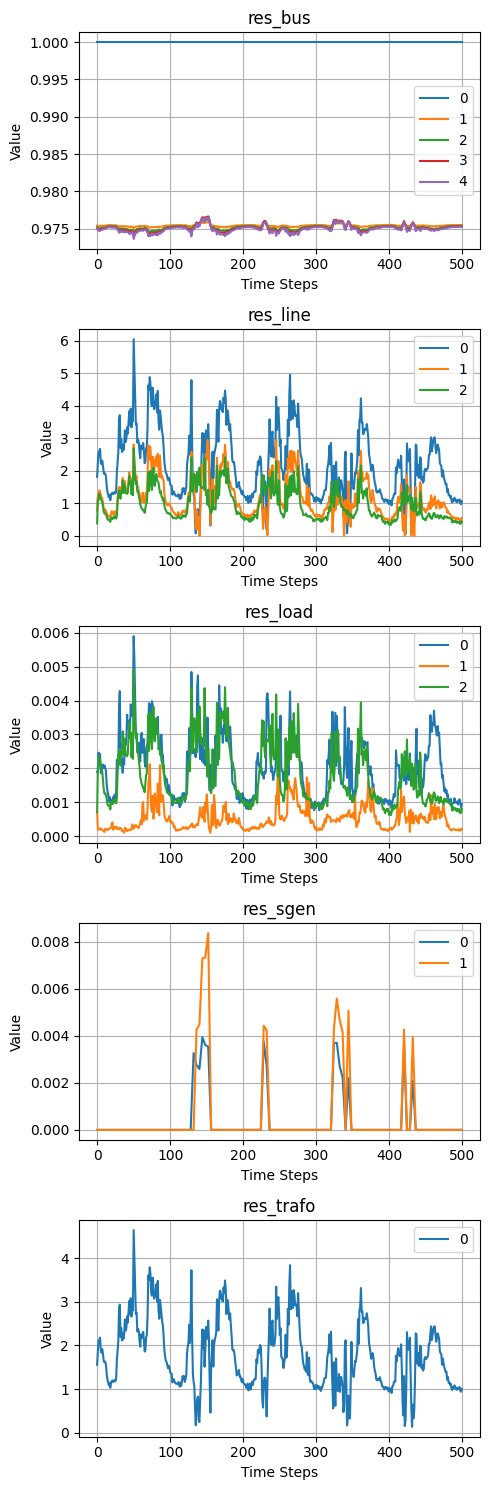

In [6]:
# 1a. Create a dictionary of load and sgen active power data for the first 500 samples
inputdict = {
    'load': [(data, f'load {name}') for name, data in ts_sim.load_active_power_data.iloc[range(500), [0, 1, 2]].items()],
    'sgen': [(data, f'sgen {name}') for name, data in ts_sim.sgen_active_power_data.iloc[range(500), [0, 1]].items()]
}
# 1b. Define the output directory for generated files
output_dir = os.path.join('helper', 'output','toy_grid')
os.makedirs(output_dir, exist_ok=True)

# 1c.Create a toy grid with specified parameters
toy_grid = grid_manager.create_grid('ToyGrid', 0.4, 10.0, 0.05, inputdict, mode='row')

# 2.Run a Time-Series Simulation: 
ow = grid_manager.time_series(inputfeed=inputdict, output_dir=output_dir, grid=toy_grid)
#Visualize the `toy_grid` with annotations
grid_manager.plot_annotated_grid(toy_grid)
# 3.Read and Plot Results
# Reading the saved results from the output directory and storing them as dataframes
# The results saved in the `output_dir` are read and stored as dataframes using the `read_and_plot_xlsx_files` function. Additionally, the data is plotted for further analysis.
dataframes = grid_manager.read_and_plot_xlsx_files(output_dir)

# **Run Power Flow on SimBenchGrid Simulation**

/home/iai/ii6824/.local/lib/python3.9/site-packages/simbench/converter/csv_data_manipulation.py:55: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  csv_data["Node"].type.loc[idx_nodes_dupl_sw] = new_type_name
/home/iai/ii6824/.local/lib/python

Simbench net representation:
This pandapower network includes the following parameter tables:
   - bus (15 elements)
   - load (28 elements)
   - sgen (8 elements)
   - storage (5 elements)
   - switch (28 elements)
   - ext_grid (1 element)
   - line (13 elements)
   - trafo (1 element)
   - bus_geodata (15 elements)
   - loadcases (6 elements)

Consistency checked and adjusted bus names:
0      MV1.101 Bus 0
1      LV1.101 Bus 1
2      LV1.101 Bus 2
3      LV1.101 Bus 3
4      LV1.101 Bus 4
5      LV1.101 Bus 5
6      LV1.101 Bus 6
7      LV1.101 Bus 7
8      LV1.101 Bus 8
9      LV1.101 Bus 9
10    LV1.101 Bus 10
11    LV1.101 Bus 11
12    LV1.101 Bus 12
13    LV1.101 Bus 13
14    LV1.101 Bus 14
Name: name, dtype: object

*** Initial loads ***
               name  bus    p_mw  q_mvar  const_z_percent  const_i_percent  \
0    LV1.101 Load 1   10  0.0059  0.0024              0.0              0.0   
1    LV1.101 Load 2    8  0.0030  0.0012              0.0              0.0   
2    LV1.

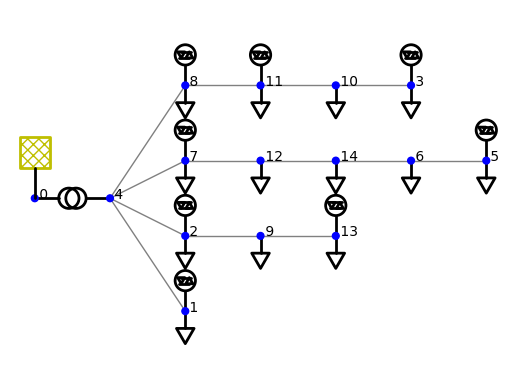

/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/timeseries/output_writer.py:177: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
      dtype='int64', length=500)' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  self.output["Parameters"].loc[:, "time_step"] = self.time_steps
/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/control/run_control.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  level = controller.level.fillna(0).apply(asarray).values
100%|██████████| 500/500 [00:04<00:00, 105.71it/s]


In [7]:
# Code representing a net
sb_code = '1-LV-rural1--2-sw'

# Get the net via sb_code
sb_grid = sb.get_simbench_net(sb_code)
print("Simbench net representation:")
print(sb_grid)

# Perform consistency check of bus IDs and adjust if necessary
sb_grid.bus['name'] = grid_manager.fix_bus_names(sb_grid.bus['name'])
print("\nConsistency checked and adjusted bus names:")
print(sb_grid.bus['name'])

# Print the initial load data
print("\n*** Initial loads ***")
print(sb_grid.load)

# Remove all additional loads with different characteristics, e.g., electric heat
print("\n*** Remove all additional loads with different characteristics, e.g., electric heat ***")
sb_grid.load = sb_grid.load.head(13)
print(sb_grid.load)
# Visualize the sb_code =`1-LV-rural1--2-sw` with annotations
grid_manager.plot_annotated_grid(sb_grid)
# 1a. Get of load and sgen active power profiles for the first 500 samples
inputdict = {'load': [(ts_sim.profiles[('load', 'p_mw')].loc[range(500),[int(name[name.rfind(' ')+1:])-1]], name) for name in sb_grid.load['name']],
             'sgen': [(ts_sim.profiles[('sgen', 'p_mw')].loc[range(500),[int(name[name.rfind(' ')+1:])-1]], name) for name in sb_grid.sgen['name']]
             }
# 1b. Define the output directory for generated files
output_dir = os.path.join('helper','output','simbench_grid')
os.makedirs(output_dir, exist_ok=True)

# 2.Run a Time-Series Simulation: 
ow = grid_manager.time_series(inputfeed=inputdict, output_dir=output_dir, grid=sb_grid)

### **Extracting a Single Feeder from a 15-Bus SimBench Grid**
The following section describes the process of extracting a single feeder zone from a 15-bus LV distribution grid provided by SimBench. This grid includes 15 buses and the associated loads and PV profiles. The aim is to isolate a single feeder zone, which simplifies the grid for more focused analysis. Below, we provide a detailed code implementation for this extraction process using the open-source library Pandapower.

First, we visualize the original grid to identify the buses to be removed:

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


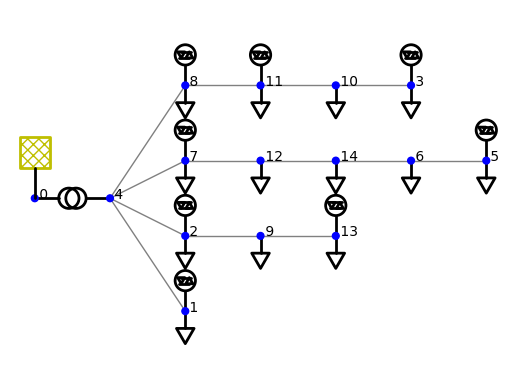

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


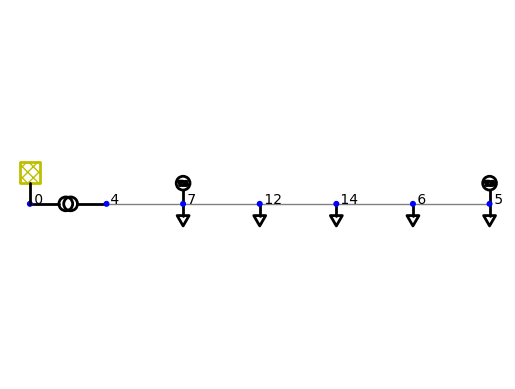

              name  bus      p_mw  q_mvar  const_z_percent  const_i_percent  \
0   LV1.101 Load 3    6  0.000806  0.0020              0.0              0.0   
1   LV1.101 Load 6    3  0.000494  0.0012              0.0              0.0   
2   LV1.101 Load 9    4  0.000479  0.0012              0.0              0.0   
3  LV1.101 Load 10    5  0.001958  0.0046              0.0              0.0   
4  LV1.101 Load 13    2  0.002187  0.0054              0.0              0.0   

   sn_mva  scaling  in_service type profile   subnet max_p_mw min_q_mvar  \
0  0.0053      1.0        True  NaN    L1-A  LV1.101      NaN        NaN   
1  0.0032      1.0        True  NaN    L1-A  LV1.101      NaN        NaN   
2  0.0032      1.0        True  NaN    L2-A  LV1.101      NaN        NaN   
3  0.0128      1.0        True  NaN    L1-A  LV1.101      NaN        NaN   
4  0.0147      1.0        True  NaN    L2-A  LV1.101      NaN        NaN   

  voltLvl max_q_mvar min_p_mw  
0       7        NaN      NaN  
1   

In [8]:
grid_manager.plot_annotated_grid(sb_grid)
# List of bus IDs to be removed to obtain the single feeder zone
# These IDs correspond to specific feeders within the grid.
remove_bus_list = [8, 11, 10, 3,  # First feeder
                   2, 9, 13,      # Second feeder
                   1              # Fourth feeder
                  ]
# List of keys corresponding to the tables that need to be modified.
ppnet_keys_list = ['bus', 'load', 'sgen', 'ext_grid', 'line', 'trafo', 'bus_geodata']
# Next, we use function extract_feeder to extract the feeder from the grid by removing the specified buses and adjusting the remaining elements accordingly:
feeder_grid = grid_manager.extract_feeder(sb_grid, remove_bus_list, ppnet_keys_list)
print(feeder_grid.load)

##### **Run Power Flow on Single Feeder Zone from SimBench Grid**

/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/timeseries/output_writer.py:177: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
      dtype='int64', length=500)' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  self.output["Parameters"].loc[:, "time_step"] = self.time_steps
/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/control/run_control.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  level = controller.level.fillna(0).apply(asarray).values
100%|██████████| 500/500 [00:02<00:00, 249.65it/s]
No or insu

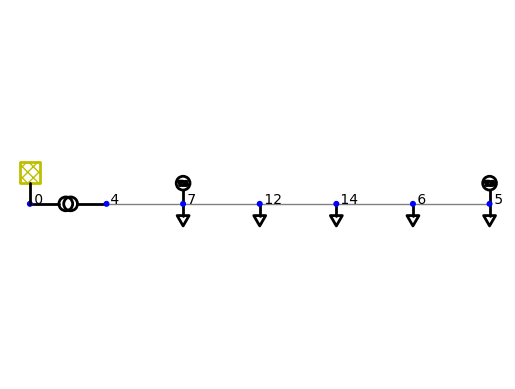

/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/timeseries/output_writer.py:177: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687],
      dtype='int64', length=2688)' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  self.output["Parameters"].loc[:, "time_step"] = self.time_steps
/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/control/run_control.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  level = controller.level.fillna(0).apply(asarray).values


              name  bus      p_mw  q_mvar  const_z_percent  const_i_percent  \
0   LV1.101 Load 3    6  0.000806  0.0020              0.0              0.0   
1   LV1.101 Load 6    3  0.000494  0.0012              0.0              0.0   
2   LV1.101 Load 9    4  0.000479  0.0012              0.0              0.0   
3  LV1.101 Load 10    5  0.001958  0.0046              0.0              0.0   
4  LV1.101 Load 13    2  0.002187  0.0054              0.0              0.0   

   sn_mva  scaling  in_service type profile   subnet max_p_mw min_q_mvar  \
0  0.0053      1.0        True  NaN    L1-A  LV1.101      NaN        NaN   
1  0.0032      1.0        True  NaN    L1-A  LV1.101      NaN        NaN   
2  0.0032      1.0        True  NaN    L2-A  LV1.101      NaN        NaN   
3  0.0128      1.0        True  NaN    L1-A  LV1.101      NaN        NaN   
4  0.0147      1.0        True  NaN    L2-A  LV1.101      NaN        NaN   

  voltLvl max_q_mvar min_p_mw  
0       7        NaN      NaN  
1   

100%|██████████| 2688/2688 [00:10<00:00, 254.35it/s]


In [9]:
# 1a. Get of load and sgen active power profiles for the first 500 samples
inputdict = {'load': [(ts_sim.profiles[('load', 'p_mw')].loc[range(500),[int(name[name.rfind(' ')+1:])-1]], name) for name in feeder_grid.load['name']],
             'sgen': [(ts_sim.profiles[('sgen', 'p_mw')].loc[range(500),[int(name[name.rfind(' ')+1:])-1]], name) for name in feeder_grid.sgen['name']]
             }
# 1b. Define the output directory for generated files
output_dir = os.path.join('helper','output','single_feeder_grid')
os.makedirs(output_dir, exist_ok=True)
# 1c.feeder_grid

# 2.Run a Time-Series Simulation: 
ow = grid_manager.time_series(inputfeed=inputdict, output_dir=output_dir, grid=feeder_grid)

##### **Run Power Flow with Original Data**
#Set the start
start = 0
#start = 180*96
#15 min resultion; (96 * 15 min = 24 h * 7 days *2 * 2 = 28 days)
duration = 96*7*2*2 # 4 weeks
# duration = 96*7*2 # 2 weeks
#Finalize time interval
time_interval = range(start, start + duration)
#Scaling load and PV profiles
scaling = 5
# Scale load and sgen active power profiles for full dataset
inputdict = {'load': [(scaling * ts_sim.profiles[('load', 'p_mw')].loc[time_interval,[int(name[name.rfind(' ')+1:])-1]], name) for name in feeder_grid.load['name']],
             'sgen': [(scaling * ts_sim.profiles[('sgen', 'p_mw')].loc[time_interval,[int(name[name.rfind(' ')+1:])-1]], name) for name in feeder_grid.sgen['name']]
             }
# Define the output directory for single feeder zone 
output_dir = os.path.join('helper','output', 'single_feeder_grid')

feeder_grid = grid_manager.extract_feeder(sb_grid, remove_bus_list, ppnet_keys_list)
print(feeder_grid.load)
grid_manager.time_series(inputdict, output_dir, feeder_grid)

In [10]:
res_load_original =grid_manager.load_data_from_directory(directory=output_dir, data_type='res_load', file_name='p_mw')
res_sgen_original = grid_manager.load_data_from_directory(directory=output_dir, data_type='res_sgen', file_name='p_mw')
res_bus_original = grid_manager.load_data_from_directory(directory=output_dir, data_type='res_bus', file_name='vm_pu')
res_trafo_original = grid_manager.load_data_from_directory(directory=output_dir, data_type='res_trafo', file_name='loading_percent')
res_line_original = grid_manager.load_data_from_directory(directory=output_dir, data_type='res_line', file_name='loading_percent')

load_original = pd.DataFrame(dict([(name, data.to_numpy().ravel().tolist()) for data, name in inputdict['load']]))
sgen_original = pd.DataFrame(dict([(name, data.to_numpy().ravel().tolist()) for data, name in inputdict['sgen']]))

helper/output/single_feeder_grid/res_load/p_mw.xlsx
helper/output/single_feeder_grid/res_sgen/p_mw.xlsx
helper/output/single_feeder_grid/res_bus/vm_pu.xlsx
helper/output/single_feeder_grid/res_trafo/loading_percent.xlsx
helper/output/single_feeder_grid/res_line/loading_percent.xlsx


##### **Create and Modify Labels**

In [11]:
# Discretize the original load and sgen data using standard deviation as the binning factor
print("Discretizing original load and sgen data...")
load_labels = ts_sim.label_processor.discretize(load_original, bin_by='std', factor=1)
sgen_labels = ts_sim.label_processor.discretize(sgen_original, bin_by='std', factor=1)
print("Load labels (original):")
print(load_labels.head())
print("Sgen labels (original):")
print(sgen_labels.head())

# Modify the labels using peak elevation approach
print("Applying peak elevation approach to labels...")
load_labels_modified = ts_sim.label_processor.peak_elevation_approach(load_labels, no_neighbors=10, threshold=1) #_n10t1  feeder_sgens_4w_labels_ordinal_ "n5t1p15_n3.csv"
sgen_labels_modified = ts_sim.label_processor.peak_elevation_approach(sgen_labels, no_neighbors=5, threshold=1) #_n5t1
print("Load labels modified (elevation):")
print(load_labels_modified.head())
print("Sgen labels modified (elevation):")
print(sgen_labels_modified.head())

# Further modify the labels using peak spreading approach
print("Applying peak spreading approach to labels...")
load_labels_modified = ts_sim.label_processor.peak_spreading_approach(df=load_labels_modified, no_neighbors=3) # _n3
sgen_labels_modified = ts_sim.label_processor.peak_spreading_approach(df=sgen_labels_modified, no_neighbors=3) # _n3  # feeder_sgens_4w_labels_ordinal_ "n5t1p15_n3.csv"
print("Load labels modified (spreading):")
print(load_labels_modified.head())
print("Sgen labels modified (spreading):")
print(sgen_labels_modified.head())

Discretizing original load and sgen data...
Load labels (original):
   LV1.101 Load 3  LV1.101 Load 6  LV1.101 Load 9  LV1.101 Load 10  \
0               1               1               1                1   
1               3               3               1                3   
2               3               3               2                3   
3               4               4               2                4   
4               4               4               2                4   

   LV1.101 Load 13  
0                1  
1                1  
2                2  
3                2  
4                2  
Sgen labels (original):
   LV1.101 SGen 1  LV1.101 SGen 8
0               0               0
1               0               0
2               0               0
3               0               0
4               0               0
Applying peak elevation approach to labels...
| LV1.101 Load 3   |   0 |    1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |
|:-----------------|----:|-----:|--

##### **Export**

Export original data, original labels (to this original data) and modified labels for mc_timegan  
- **`export_data_to_directory(self, path, *outs)`**: 
  - Exports multiple DataFrames to a specified directory as CSV filest.

##### Explanation of Filenames

### `feeder_sgens_4w_labels_ordinal_n5t1p15_n1`

- **4w**: Refers to a 4-week period of the data.
- **n5**: Indicates the number of neighbors is 5, using the peak elevation approach.
- **t1p15**: Represents a threshold of 1.15 in the peak elevation approach.
- **_n1**: Refers to the number of neighbors in the peak spreading approach.

### CSV Export Details

- **raw_data_path**: Path to the folder where CSV files will be exported, defined as `helper/data/raw/..`.
- **raw_labels_path**: Path to the folder where CSV files will be exported, defined as `helper/data/raw_labels/..`.
- **modify_labels_path**: Path to the folder where CSV files will be exported, defined as `helper/data/modify_labels/..`.
- **feeder_sgens_4w_data.csv**: Original SimBench data for 4 weeks.
- **feeder_sgens_4w_labels_ordinal.csv**: Original label data for 4 weeks.
- **feeder_sgens_4w_labels_ordinal_n5t1p15_n1.csv**: Modified label data based on the criteria described above.

In [12]:
# Define the local path for exporting CSV files
raw_data_path = os.path.join('helper', 'data', 'raw')
raw_labels_path = os.path.join('helper', 'data', 'raw_labels')
modify_labels_path = os.path.join('helper', 'data', 'modify_labels')

# Export data to disk
grid_manager.export_data_to_directory((sgen_original, 'feeder_sgens_4w_data.csv'),  # Original SimBench data for 4 weeks
                         path=raw_data_path)
grid_manager.export_data_to_directory((sgen_labels, 'feeder_sgens_4w_labels_ordinal.csv'),  # Original label data for 4 weeks
                         path=raw_labels_path)
grid_manager.export_data_to_directory((sgen_labels_modified, 'feeder_sgens_4w_labels_ordinal_n5t1p15_n1.csv'),  # Modified label data for 4 weeks
                         path=modify_labels_path)

Export completed for feeder_sgens_4w_data.csv at helper/data/raw/feeder_sgens_4w_data.csv
Export completed for feeder_sgens_4w_labels_ordinal.csv at helper/data/raw_labels/feeder_sgens_4w_labels_ordinal.csv
Export completed for feeder_sgens_4w_labels_ordinal_n5t1p15_n1.csv at helper/data/modify_labels/feeder_sgens_4w_labels_ordinal_n5t1p15_n1.csv


#### **Import Synthetic Data**
##### Local Path for Synthetic Data Filenames and Available Data Files
**PV**: '2024-07-23_mc_timegan_feeder_sgens_n5t1_n2.csv'

**Load**: '2024-07-23_mc_timegan_feeder_loads_n5t1p25_n2.csv'

In [13]:
# Local path to the directory containing synthetic data
local_synthetic_data_path = os.path.join('helper', 'synthetic_data')

# List files in the local directory
file_list = os.listdir(local_synthetic_data_path)
df_files = pd.DataFrame(file_list, columns=['Available Data'])

# Display the available data files
print("**Available Data Files:**")
print(df_files)
# Filenames for synthetic sgen and load data
synthetic_sgen_file_name = '2024-07-23_mc_timegan_feeder_sgens_n5t1_n2.csv'
synthetic_load_file_name = '2024-07-23_mc_timegan_feeder_loads_n5t1p25_n2.csv'

# Full paths to the synthetic sgen and load data files
synthetic_sgen_file_path = os.path.join(local_synthetic_data_path, synthetic_sgen_file_name)
synthetic_load_file_path = os.path.join(local_synthetic_data_path, synthetic_load_file_name)

# Print the paths to verify correctness
print(f"Synthetic sgen file path: {synthetic_sgen_file_path}")
print(f"Synthetic load file path: {synthetic_load_file_path}")
print("******************************************************")

# Load the synthetic sgen and load data into DataFrames
df_sgen = pd.read_csv(synthetic_sgen_file_path)
df_load = pd.read_csv(synthetic_load_file_path)

# Display the first few rows of each DataFrame to verify the data
print("**Synthetic sgen data:**")
print(df_sgen.head())
print("******************************************************")
print("**Synthetic load data:**")
print(df_load.head())
print(feeder_grid.load['profile'])

**Available Data Files:**
                                      Available Data
0     2024-07-23_mc_timegan_feeder_sgens_n5t1_n2.csv
1        2024-07-23_mc_timegan_feeder_sgens_n5t1.csv
2  2024-07-23_mc_timegan_feeder_loads_n10t1p25_n3...
3  2024-07-23_mc_timegan_feeder_loads_n10t1p25_n2...
4    2024-07-23_mc_timegan_feeder_loads_n10t1p25.csv
5  2024-07-23_mc_timegan_feeder_loads_n5t1p25_n2.csv
6  2024-07-23_mc_timegan_feeder_loads_n5t1p25_n3.csv
7     2024-07-23_mc_timegan_feeder_loads_n5t1p25.csv
Synthetic sgen file path: helper/synthetic_data/2024-07-23_mc_timegan_feeder_sgens_n5t1_n2.csv
Synthetic load file path: helper/synthetic_data/2024-07-23_mc_timegan_feeder_loads_n5t1p25_n2.csv
******************************************************
**Synthetic sgen data:**
     fake_1    fake_2
0  0.000003  0.000014
1  0.000001  0.000005
2  0.000001  0.000005
3  0.000001  0.000005
4  0.000001  0.000005
******************************************************
**Synthetic load data:**
     fake_1 

##### **Run PowerFlow with Synthetic Data**

In [14]:
#Select synthetic data
#Scaling load and PV profiles
scaling = 5
load_synthetic = pd.read_csv(synthetic_load_file_path).set_axis(list(load_original.columns), axis=1).loc[range(start, start + duration)]
sgen_synthetic = pd.read_csv(synthetic_sgen_file_path).set_axis(list(sgen_original.columns), axis=1).loc[range(start, start + duration)]
sgen_synthetic = sgen_synthetic.mask(sgen_synthetic<15*1e-6, 0) # below 15 watts everything is set to zero
load_synthetic = scaling*load_synthetic
print(sgen_synthetic.mean())
sgen_synthetic = scaling*sgen_synthetic
print(sgen_synthetic.mean())
print(output_dir)
inputdict = {'load': [(data.to_frame(), name) for name, data in load_synthetic.items()],
             'sgen': [(data.to_frame(), name) for name, data in sgen_synthetic.items()]
             }

grid_manager.time_series(inputdict, output_dir, feeder_grid)
res_bus_synthetic = grid_manager.load_data_from_directory(directory=output_dir, data_type='res_bus', file_name='vm_pu') # , feeder_grid.bus['name'])
res_trafo_synthetic = grid_manager.load_data_from_directory(directory=output_dir, data_type='res_trafo', file_name='loading_percent') # , feeder_grid.trafo['name'])
res_line_synthetic = grid_manager.load_data_from_directory(directory=output_dir, data_type='res_line', file_name='loading_percent') # , feeder_grid.line['name'])

/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/timeseries/output_writer.py:177: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687],
      dtype='int64', length=2688)' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  self.output["Parameters"].loc[:, "time_step"] = self.time_steps
/home/iai/ii6824/.local/lib/python3.9/site-packages/pandapower/control/run_control.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  level = controller.level.fillna(0).apply(asarray).values


LV1.101 SGen 1    0.001413
LV1.101 SGen 8    0.004535
dtype: float64
LV1.101 SGen 1    0.007063
LV1.101 SGen 8    0.022674
dtype: float64
helper/output/single_feeder_grid


100%|██████████| 2688/2688 [00:14<00:00, 188.21it/s]


helper/output/single_feeder_grid/res_bus/vm_pu.xlsx
helper/output/single_feeder_grid/res_trafo/loading_percent.xlsx
helper/output/single_feeder_grid/res_line/loading_percent.xlsx


##### **Evaluation**

#### Fig. 4: Grid Congestion Metric Results

This plot visualizes the grid state metrics obtained from power flow calculations using original and synthetic data generated by MC-TimeGAN over a 14-day simulation period. The metrics include:

- Transformer load (%)
- Line load (%)
- Bus voltage (p.u.)

The results are displayed in a joint plot to compare the original data against the synthetic data. 

Key details:
- Red horizontal lines indicate threshold values:
  - 100% for transformer and line loads
  - 0.95 and 1.05 per unit for bus voltage

In [15]:
data_size = 96 * 14
# Trimming data to the first 96*14 timestamps
res_trafo_original_copy = res_trafo_original.iloc[:data_size]
res_trafo_synthetic_copy = res_trafo_synthetic.iloc[:data_size]
res_line_original_copy = res_line_original.iloc[:data_size]
res_line_synthetic_copy = res_line_synthetic.iloc[:data_size]
res_bus_original_copy = res_bus_original.iloc[:data_size]
res_bus_synthetic_copy = res_bus_synthetic.iloc[:data_size]
print(data_size)

1344


helper/output/single_feeder_grid/figures/fig04_transformer_line_voltage_2w.pdf
helper/output/single_feeder_grid/figures/fig04_transformer_line_voltage_2w.pgf


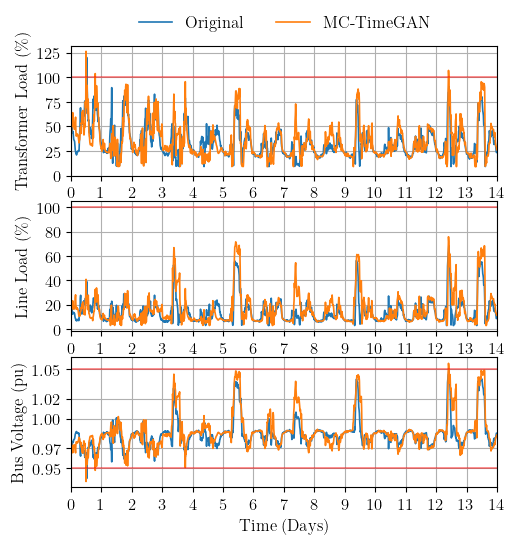

In [16]:
font_size = 12
eval.plot_trafo_line_voltage([res_trafo_original_copy, res_trafo_synthetic_copy],
                             [res_line_original_copy.iloc[:,[-1]], res_line_synthetic_copy.iloc[:,[-1]]],
                             [res_bus_original_copy.iloc[:,[2]], res_bus_synthetic_copy.iloc[:,[2]]],
                             saving=(True, 'fig04_transformer_line_voltage_2w'), fontsize=font_size)

#### Fig.3: A graphical evaluation of the underlying distributions based on sampled data points from the original and MC-TimeGAN.

Left: Load profiles

Right: PV profiles

Top: PCA for lower-dimensional representations

Bottom: t-SNE for distribution estimation

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.009474
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.952236
[t-SNE] KL divergence after 300 iterations: 1.331655
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.345875
[t-SNE] KL divergence after 300 iterations: 1.057299
helper/output/single_feeder_grid/figures/fig03_first_PCA_second_tSNE_left_load_right_PV_orginal_MCTimeGANrandom_state_58.pgf
helper/

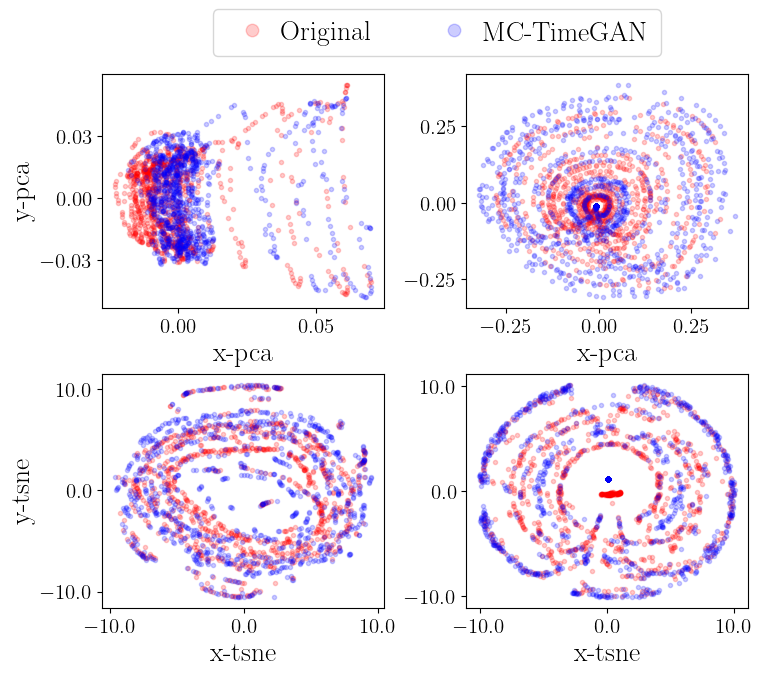

In [17]:
# Configure Matplotlib to use LaTeX for rendering text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

random_state = 58
font_size = 20

# Assuming low_dimensional_representation and preparing are defined functions
load_pca, load_hat_pca = eval.low_dimensional_representation(
    *shuffle(eval.prepare_data((load_original, False), horizon=96, shuffle_stack=False),
             eval.prepare_data((load_synthetic, False), horizon=96, shuffle_stack=False)),
    'pca', random_state=random_state)

sgen_pca, sgen_hat_pca = eval.low_dimensional_representation(
    *shuffle(eval.prepare_data((sgen_original, False), horizon=96, shuffle_stack=False),
             eval.prepare_data((sgen_synthetic, False), horizon=96, shuffle_stack=False)),
    'pca', random_state=random_state)

load_tsne, load_hat_tsne = eval.low_dimensional_representation(
    *shuffle(eval.prepare_data((load_original, False), horizon=96, shuffle_stack=False),
             eval.prepare_data((load_synthetic, False), horizon=96, shuffle_stack=False)),
    'tsne', random_state=random_state)

sgen_tsne, sgen_hat_tsne = eval.low_dimensional_representation(
    *shuffle(eval.prepare_data((sgen_original, False), horizon=96, shuffle_stack=False),
             eval.prepare_data((sgen_synthetic, False), horizon=96, shuffle_stack=False)),
    'tsne', random_state=random_state)

fig, ax = plt.subplots(2, 2, figsize=(7.5, 6), layout='constrained')

ax[0, 0].add_line(mlines.Line2D(load_pca[:, 0], load_pca[:, 1], ls='', marker='o', markersize=3, color='red', alpha=0.2, rasterized=True, label='Original'))
ax[0, 0].add_line(mlines.Line2D(load_hat_pca[:, 0], load_hat_pca[:, 1], ls='', marker='o', markersize=3, color='blue', alpha=0.2, rasterized=True, label='MC-TimeGAN'))
ax[0, 0].autoscale_view()
h, l = ax[0, 0].get_legend_handles_labels()
fig.legend(h, l, loc='lower center', bbox_to_anchor=(0.575, 1), fontsize=font_size, ncols=2, markerscale=3, handletextpad=0.05)
ax[0, 0].set_xlabel(r'x-pca', fontsize=font_size)
ax[0, 0].set_ylabel(r'y-pca', fontsize=font_size)
ax[0, 0].locator_params(tight=True, nbins=4)
ax[0, 0].tick_params(labelsize=15)
ax[0, 0].xaxis.set_major_formatter('{x:.2f}')
ax[0, 0].xaxis.set_major_locator(mticker.FixedLocator(ax[0, 0].get_xticks()))  
ax[0, 0].set_xticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[0, 0].get_xticklabels()])
ax[0, 0].yaxis.set_major_formatter('{x:.2f}')
ax[0, 0].yaxis.set_major_locator(mticker.FixedLocator(ax[0, 0].get_yticks()))  
ax[0, 0].set_yticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[0, 0].get_yticklabels()])

ax[0, 1].add_line(mlines.Line2D(sgen_pca[:, 0], sgen_pca[:, 1], ls='', marker='o', markersize=3, color='red', alpha=0.2, rasterized=True))
ax[0, 1].add_line(mlines.Line2D(sgen_hat_pca[:, 0], sgen_hat_pca[:, 1], ls='', marker='o', markersize=3, color='blue', alpha=0.2, rasterized=True))
ax[0, 1].autoscale_view()
ax[0, 1].set_xlabel(r'x-pca', fontsize=font_size)
ax[0, 1].locator_params(tight=True, nbins=4, symmetric=True)
ax[0, 1].tick_params(labelsize=15)
ax[0, 1].xaxis.set_major_formatter('{x:.2f}')
ax[0, 1].xaxis.set_major_locator(mticker.FixedLocator(ax[0, 1].get_xticks())) 
ax[0, 1].set_xticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[0, 1].get_xticklabels()])
ax[0, 1].yaxis.set_major_formatter('{x:.2f}')
ax[0, 1].yaxis.set_major_locator(mticker.FixedLocator(ax[0, 1].get_yticks())) 
ax[0, 1].set_yticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[0, 1].get_yticklabels()])

ax[1, 0].add_line(mlines.Line2D(load_tsne[:, 0], load_tsne[:, 1], ls='', marker='o', markersize=3, color='red', alpha=0.2, rasterized=True))
ax[1, 0].add_line(mlines.Line2D(load_hat_tsne[:, 0], load_hat_tsne[:, 1], ls='', marker='o', markersize=3, color='blue', alpha=0.2, rasterized=True))
ax[1, 0].autoscale_view()
ax[1, 0].set_xlabel(r'x-tsne', fontsize=font_size)
ax[1, 0].set_ylabel(r'y-tsne', fontsize=font_size)
ax[1, 0].locator_params(tight=True, nbins=4)
ax[1, 0].tick_params(labelsize=15)
ax[1, 0].xaxis.set_major_formatter('{x:.1f}')
ax[1, 0].xaxis.set_major_locator(mticker.FixedLocator(ax[1, 0].get_xticks())) 
ax[1, 0].set_xticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[1, 0].get_xticklabels()])
ax[1, 0].yaxis.set_major_formatter('{x:.1f}')
ax[1, 0].yaxis.set_major_locator(mticker.FixedLocator(ax[1, 0].get_yticks())) 
ax[1, 0].set_yticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[1, 0].get_yticklabels()])

ax[1, 1].add_line(mlines.Line2D(sgen_tsne[:, 0], sgen_tsne[:, 1], ls='', marker='o', markersize=3, color='red', alpha=0.2, rasterized=True))
ax[1, 1].add_line(mlines.Line2D(sgen_hat_tsne[:, 0], sgen_hat_tsne[:, 1], ls='', marker='o', markersize=3, color='blue', alpha=0.2, rasterized=True))
ax[1, 1].autoscale_view()
ax[1, 1].set_xlabel(r'x-tsne', fontsize=font_size)
ax[1, 1].locator_params(tight=True, nbins=4)
ax[1, 1].tick_params(labelsize=15)
ax[1, 1].xaxis.set_major_formatter('{x:.1f}')
ax[1, 1].xaxis.set_major_locator(mticker.FixedLocator(ax[1, 1].get_xticks())) 
ax[1, 1].set_xticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[1, 1].get_xticklabels()])
ax[1, 1].yaxis.set_major_formatter('{x:.1f}')
ax[1, 1].yaxis.set_major_locator(mticker.FixedLocator(ax[1, 1].get_yticks())) 
ax[1, 1].set_yticklabels([mticker.StrMethodFormatter.fix_minus(label.get_text()) for label in ax[1, 1].get_yticklabels()])

# Define the directory and create it if it doesn't exist
figures_dir = os.path.join('helper', 'output', 'single_feeder_grid', 'figures')
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Save the plot as both a PGF and a PDF file
base_file_name = os.path.join(figures_dir, 'fig03_first_PCA_second_tSNE_left_load_right_PV_orginal_MCTimeGAN' + 'random_state_' + str(random_state))
pgf_file_name = base_file_name + '.pgf'
pdf_file_name = base_file_name + '.pdf'

print(pgf_file_name)
print(pdf_file_name)

plt.savefig(pgf_file_name, bbox_inches='tight', pad_inches=0, format='pgf')
plt.savefig(pdf_file_name, bbox_inches='tight', pad_inches=0, dpi=200)

plt.show()

## **Additional Visualizations**

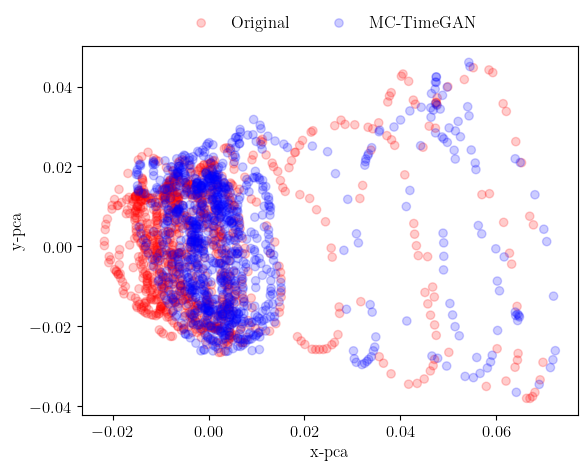

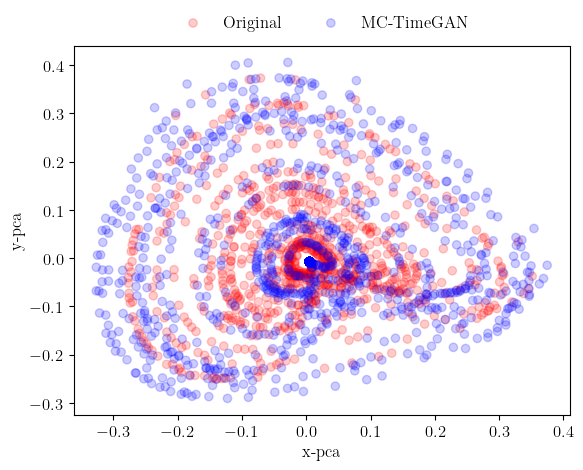

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.009385
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.893494
[t-SNE] KL divergence after 300 iterations: 1.335910


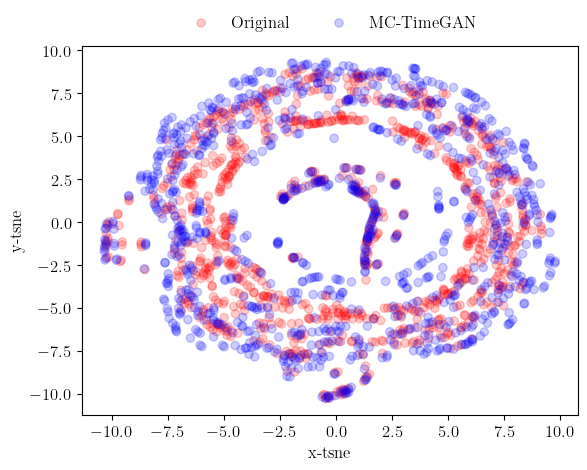

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.491947
[t-SNE] KL divergence after 300 iterations: 1.022183


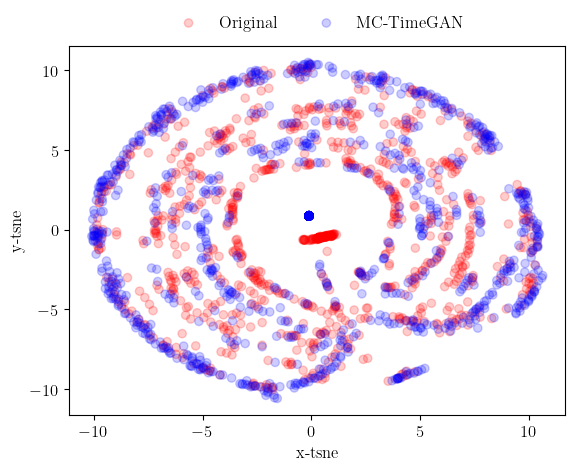

|           |   LV1.101 Load 3 |   LV1.101 Load 6 |   LV1.101 Load 9 |   LV1.101 Load 10 |   LV1.101 Load 13 |
|-----------|------------------|------------------|------------------|-------------------|-------------------|
| Mean_O    |       0.00489669 |       0.00299797 |       0.0050891  |        0.011892   |        0.0232402  |
| Mean_S    |       0.00534357 |       0.00327126 |       0.00534701 |        0.0129699  |        0.0243858  |
| Delta (%) |       9.12613    |       9.11577    |       5.06787    |        9.06463    |        4.92917    |
| Max_O     |       0.0245     |       0.015      |       0.015      |        0.0595     |        0.0685     |
| Max_S     |       0.0258632  |       0.015818   |       0.0158857  |        0.0625083  |        0.0714059  |
| Delta (%) |       5.56401    |       5.45308    |       5.90441    |        5.05604    |        4.24213    |
| Min_O     |       0.00172372 |       0.00105534 |       0.00186842 |        0.00418618 |        0.00853243 |
|

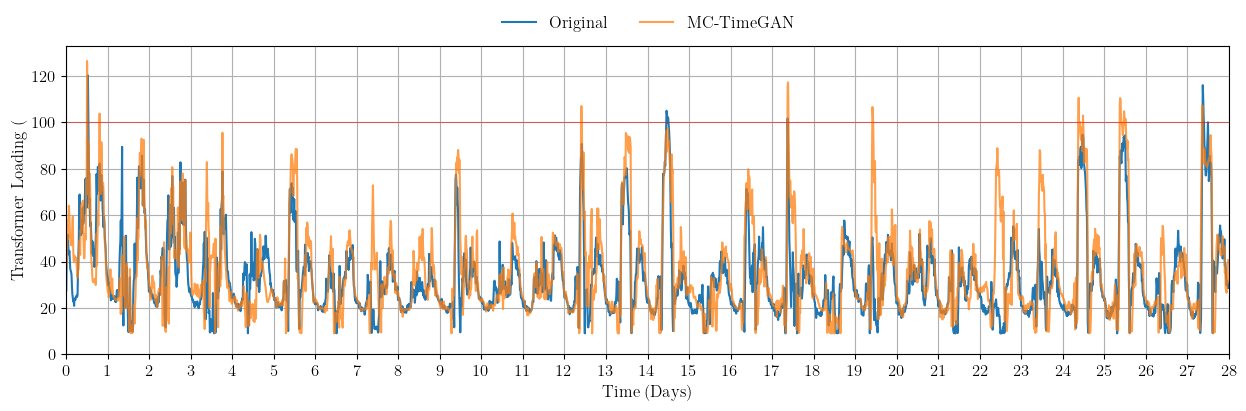

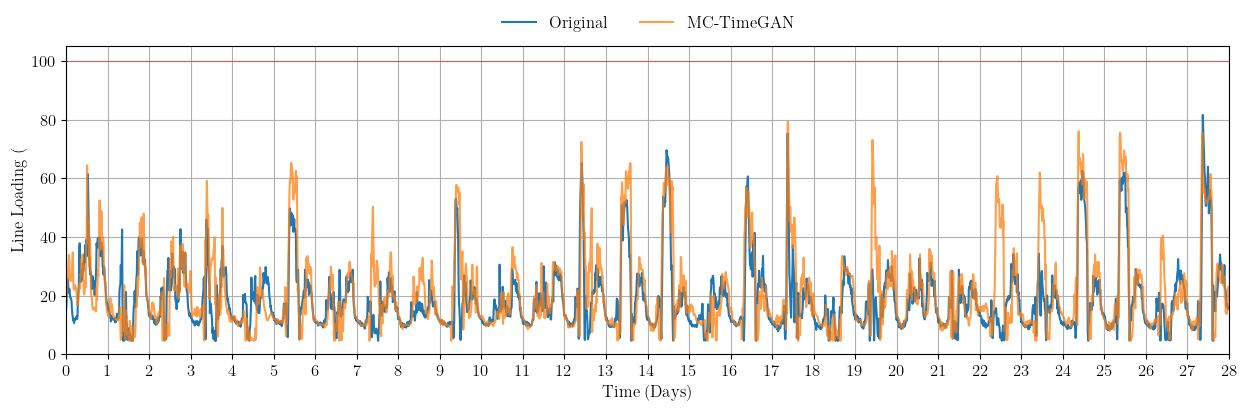

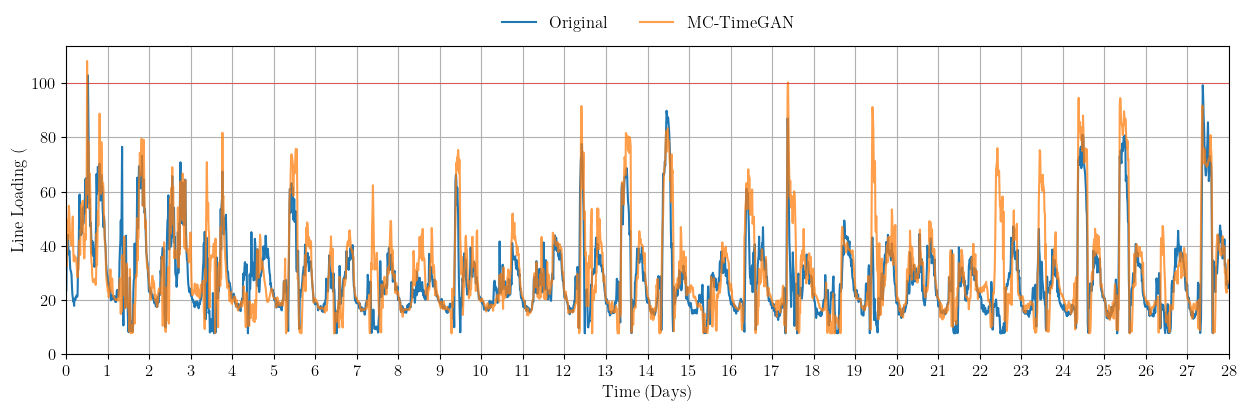

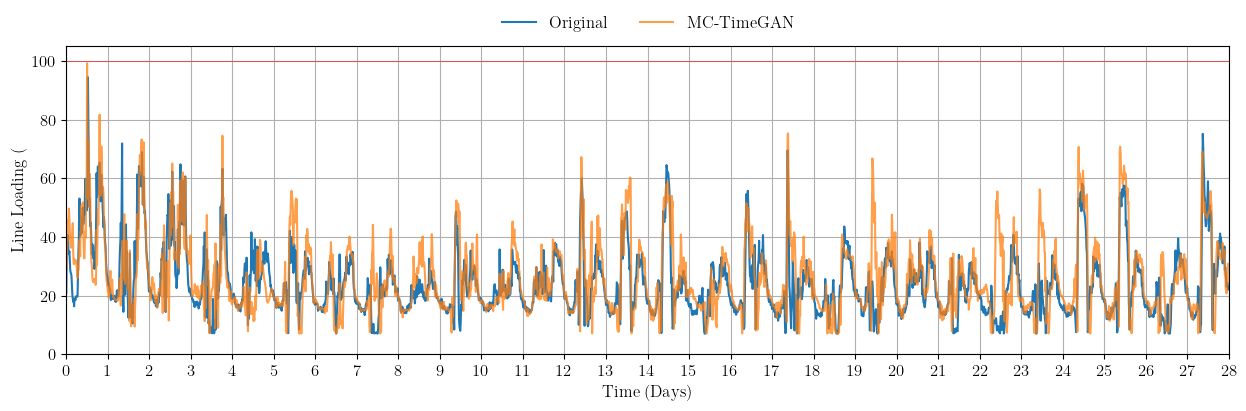

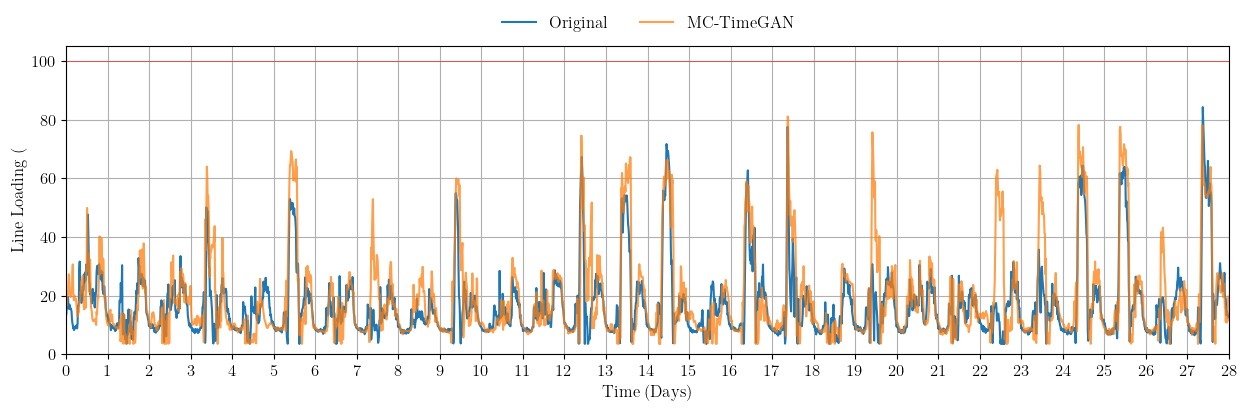

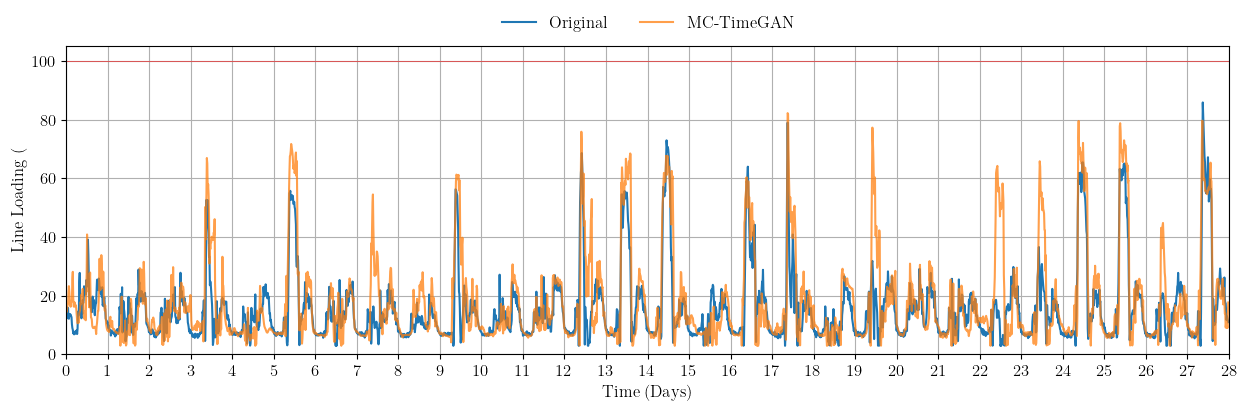

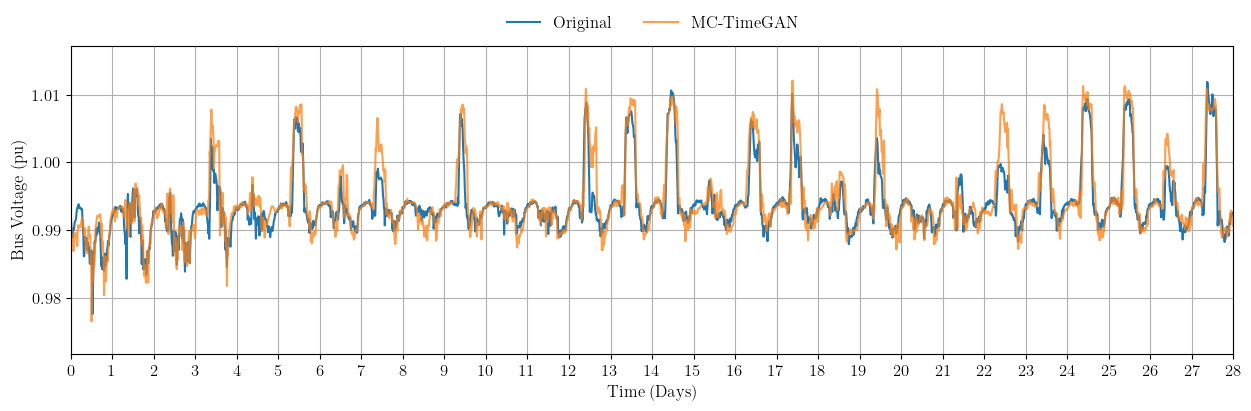

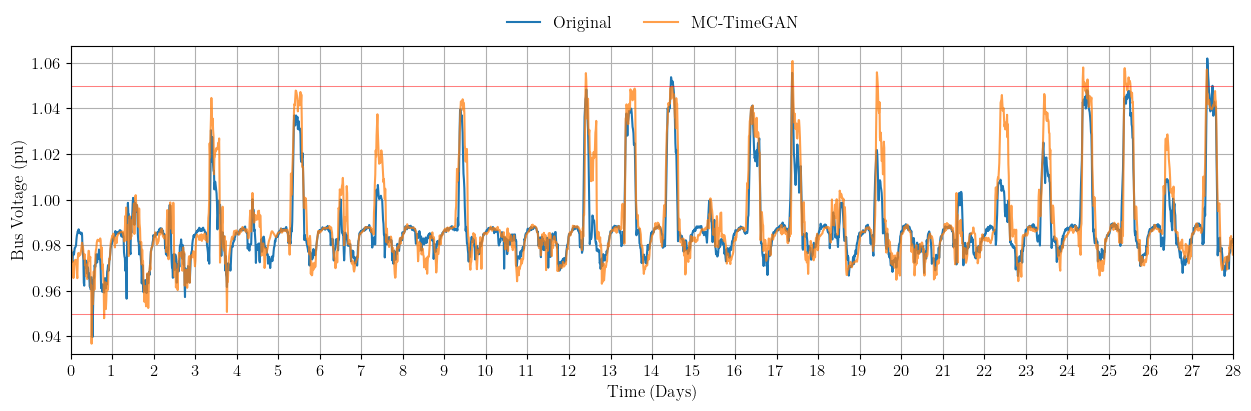

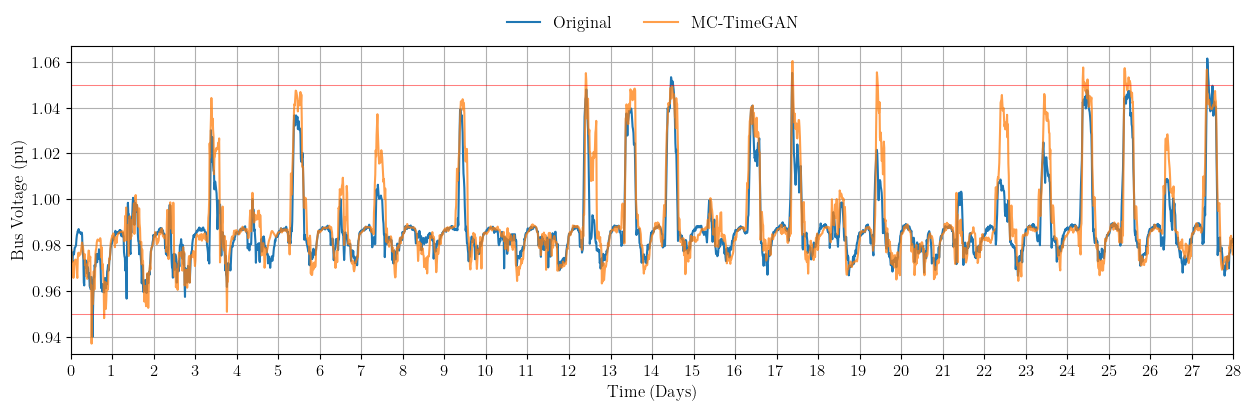

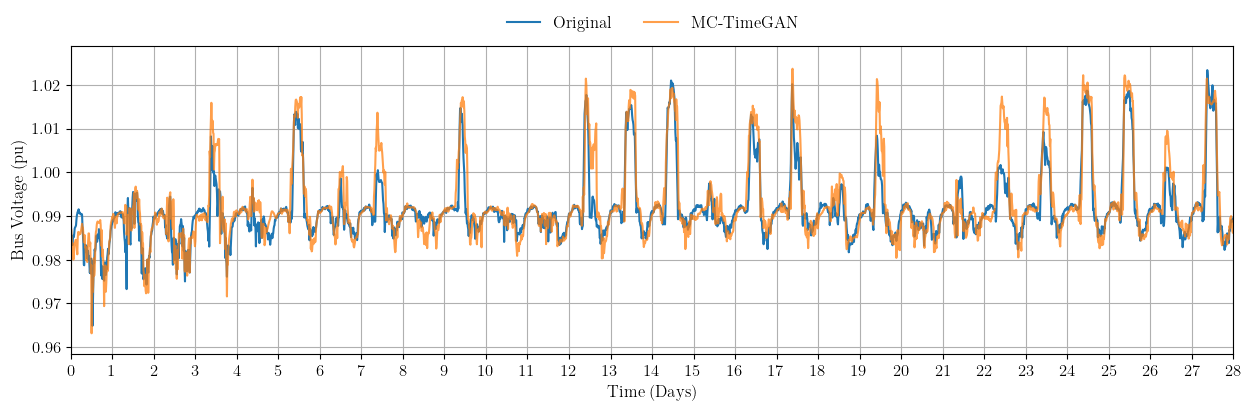

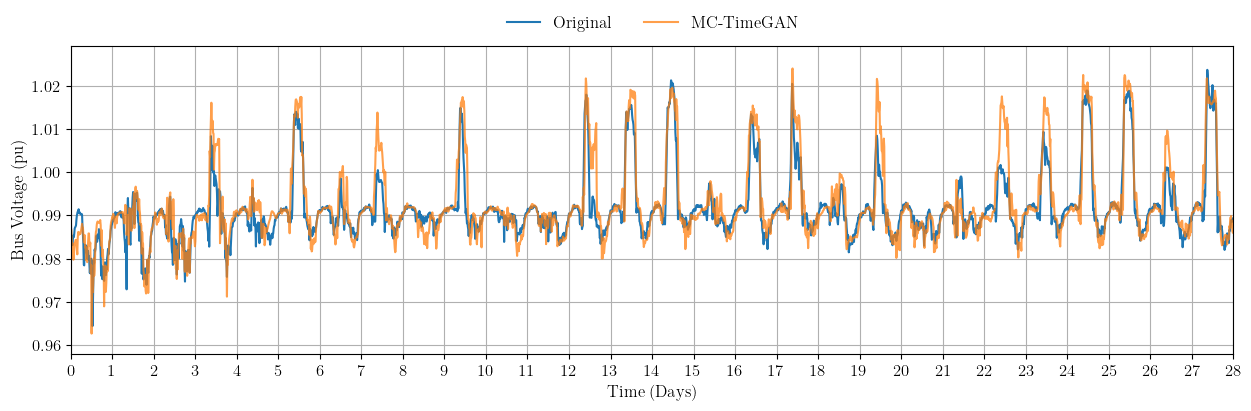

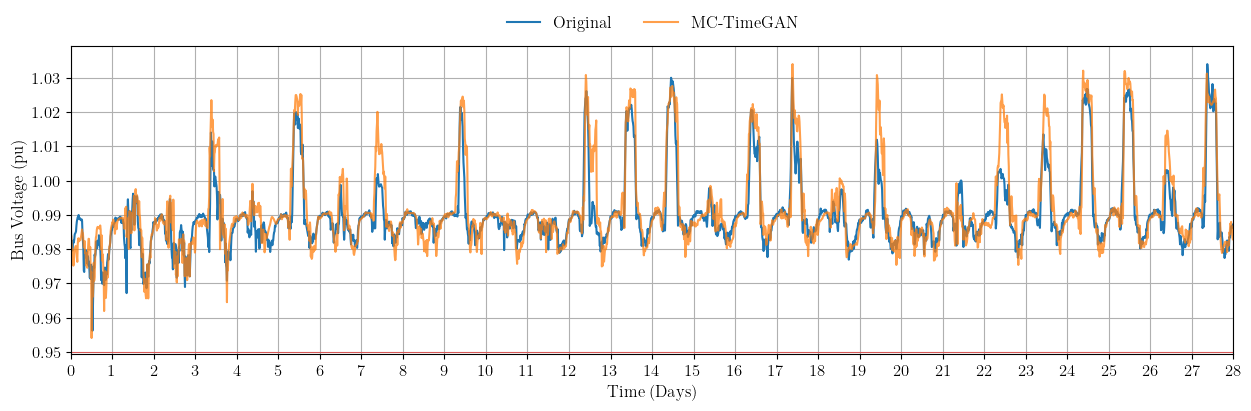

In [18]:
eval.distribution_estimate(*shuffle(eval.prepare_data((load_original, False), horizon=96, shuffle_stack=False),
                              eval.prepare_data((load_synthetic, False), horizon=96, shuffle_stack=False)),
                      'pca')
eval.distribution_estimate(*shuffle(eval.prepare_data((sgen_original, False), horizon=96, shuffle_stack=False),
                               eval.prepare_data((sgen_synthetic, False), horizon=96, shuffle_stack=False)),
                      'pca')
eval.distribution_estimate(*shuffle(eval.prepare_data((load_original, False), horizon=96, shuffle_stack=False),
                               eval.prepare_data((load_synthetic, False), horizon=96, shuffle_stack=False)),
                      'tsne')
eval.distribution_estimate(*shuffle(eval.prepare_data((sgen_original, False), horizon=96, shuffle_stack=False),
                               eval.prepare_data((sgen_synthetic, False), horizon=96, shuffle_stack=False)),
                      'tsne')
eval.numeric_evaluation(load_original, load_synthetic)
print("****************************************")
eval.numeric_evaluation(sgen_original, sgen_synthetic)
print("****************************************")
eval.numeric_evaluation(res_trafo_original, res_trafo_synthetic)
print("****************************************")
eval.numeric_evaluation(res_line_original, res_line_synthetic)
print("****************************************")
eval.numeric_evaluation(res_bus_original, res_bus_synthetic)
print("****************************************")
eval.plot_res(res_trafo_original,
         res_trafo_synthetic,
          [100],
         'Transformer Loading (%)')
eval.plot_res(res_line_original,
         res_line_synthetic,
          [100],
         'Line Loading (%)')
eval.plot_res(res_bus_original.iloc[:,1:],
        res_bus_synthetic.iloc[:,1:],
        [0.95, 1.05],
        'Bus Voltage (pu)')

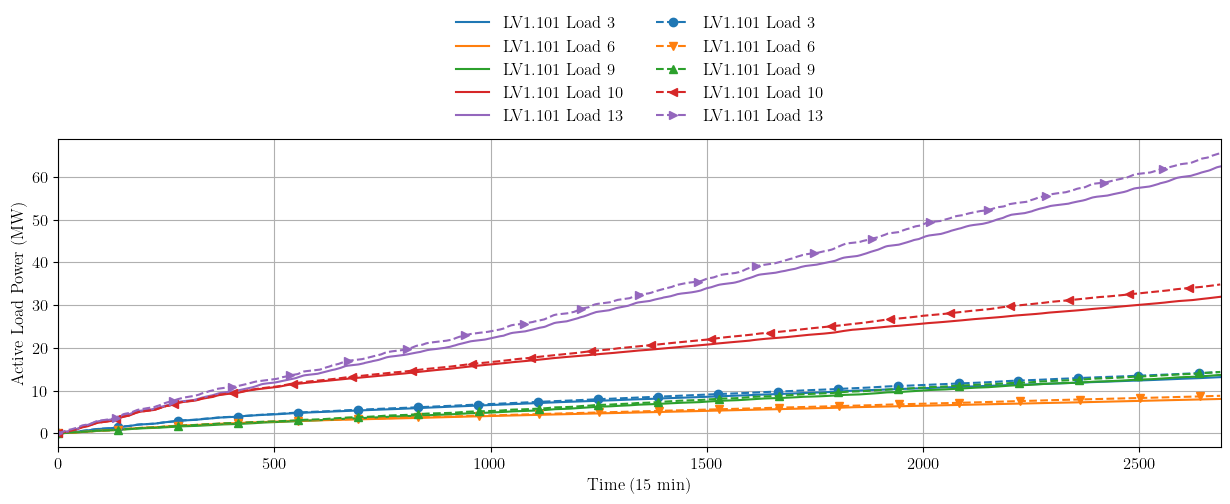

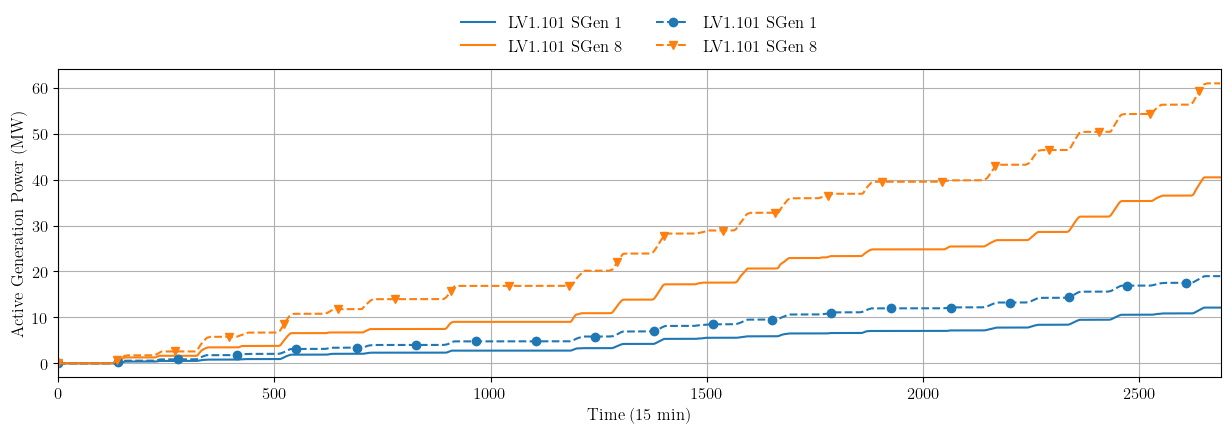

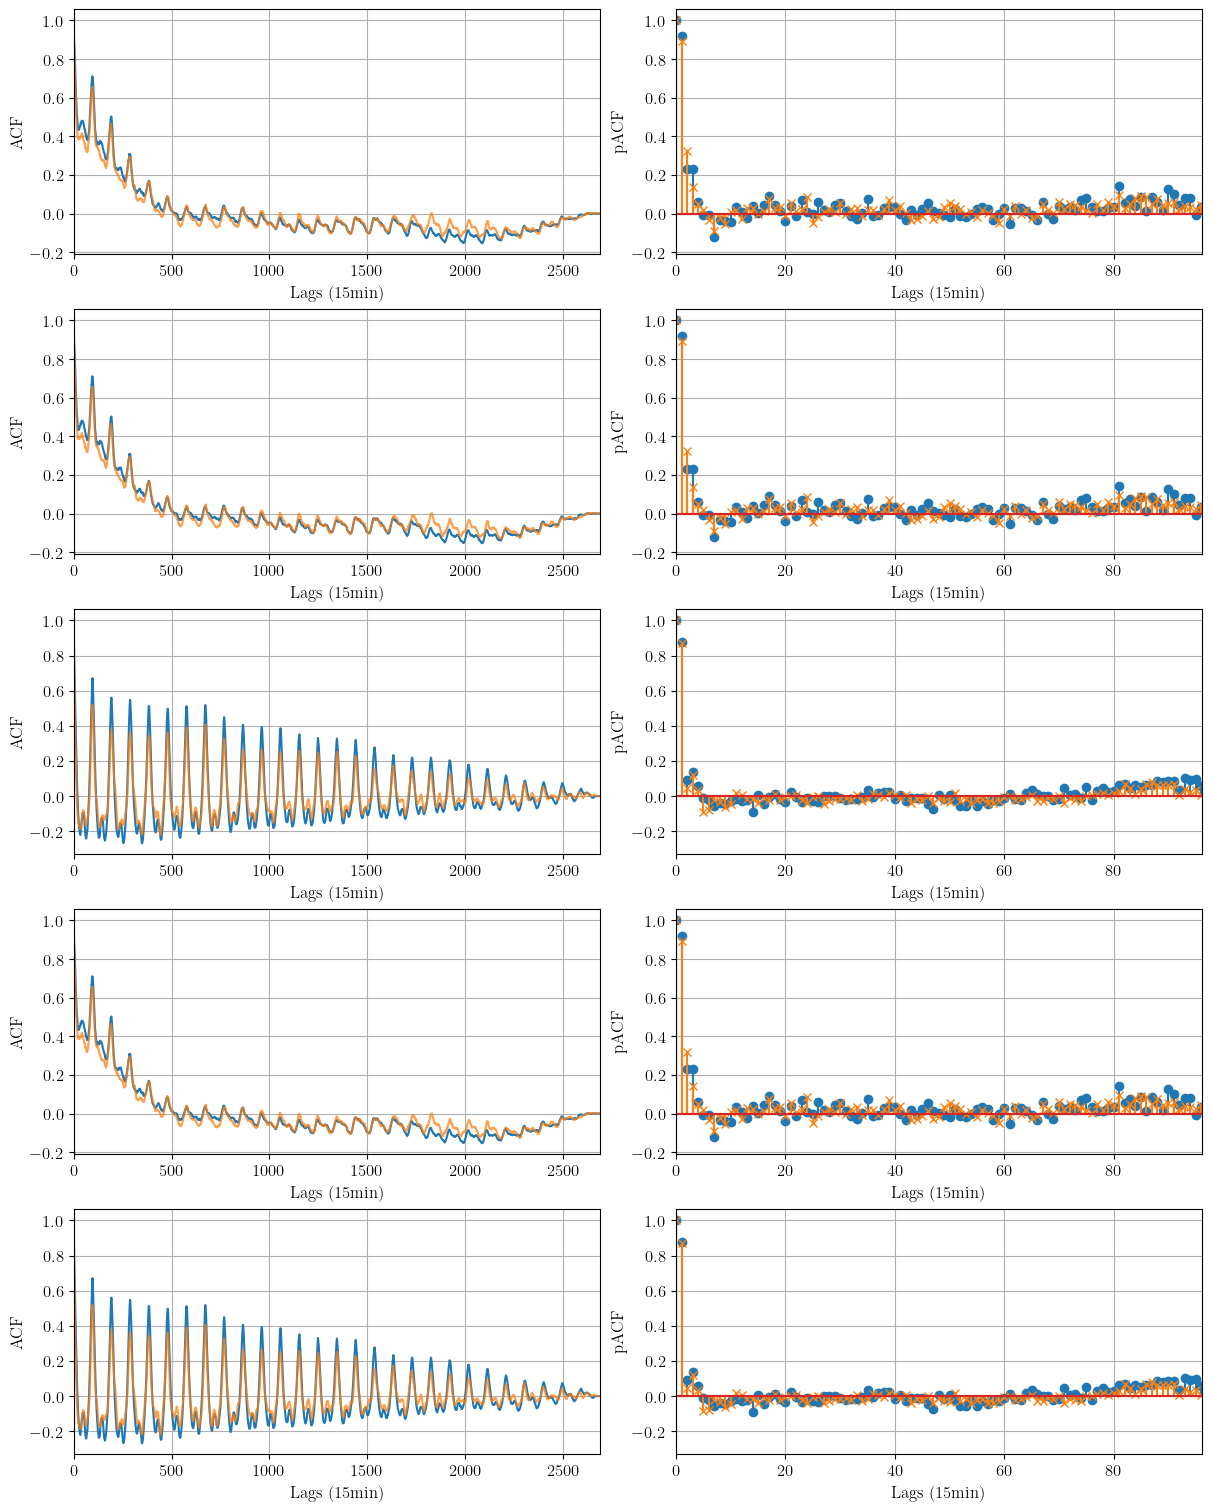

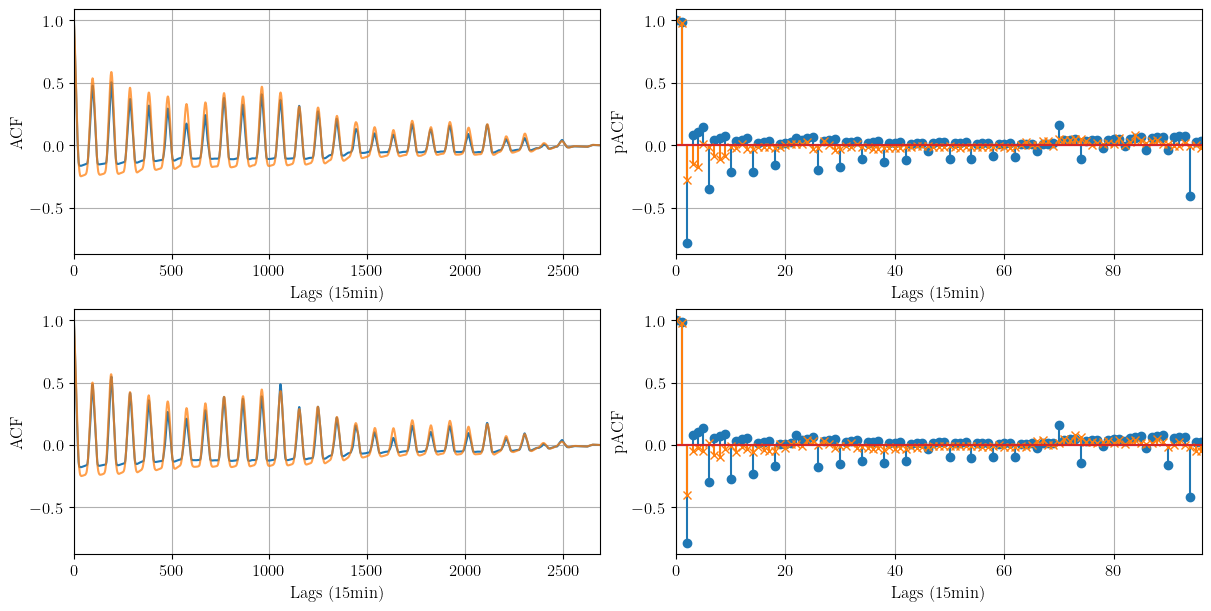

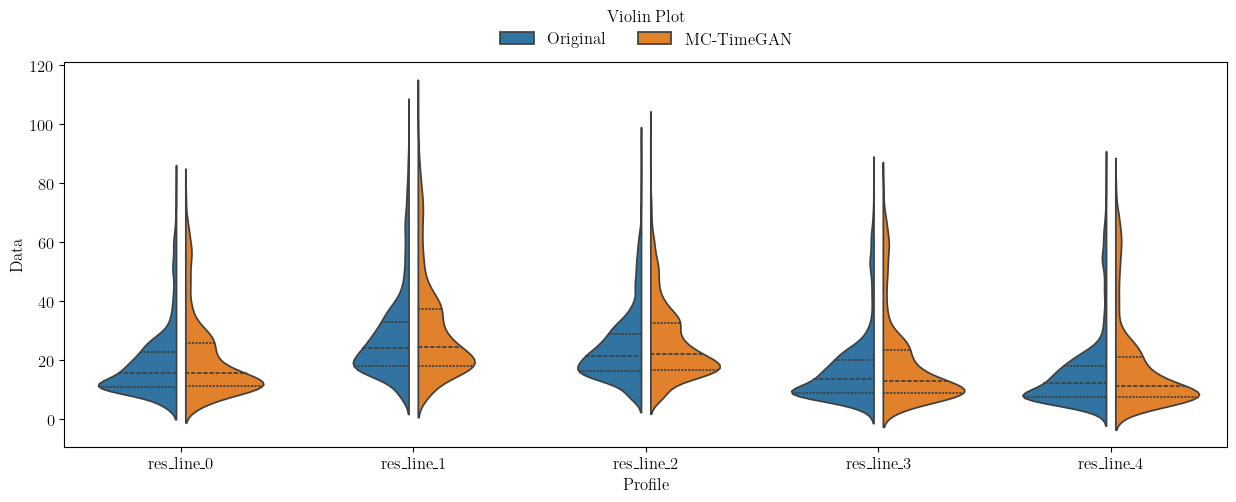

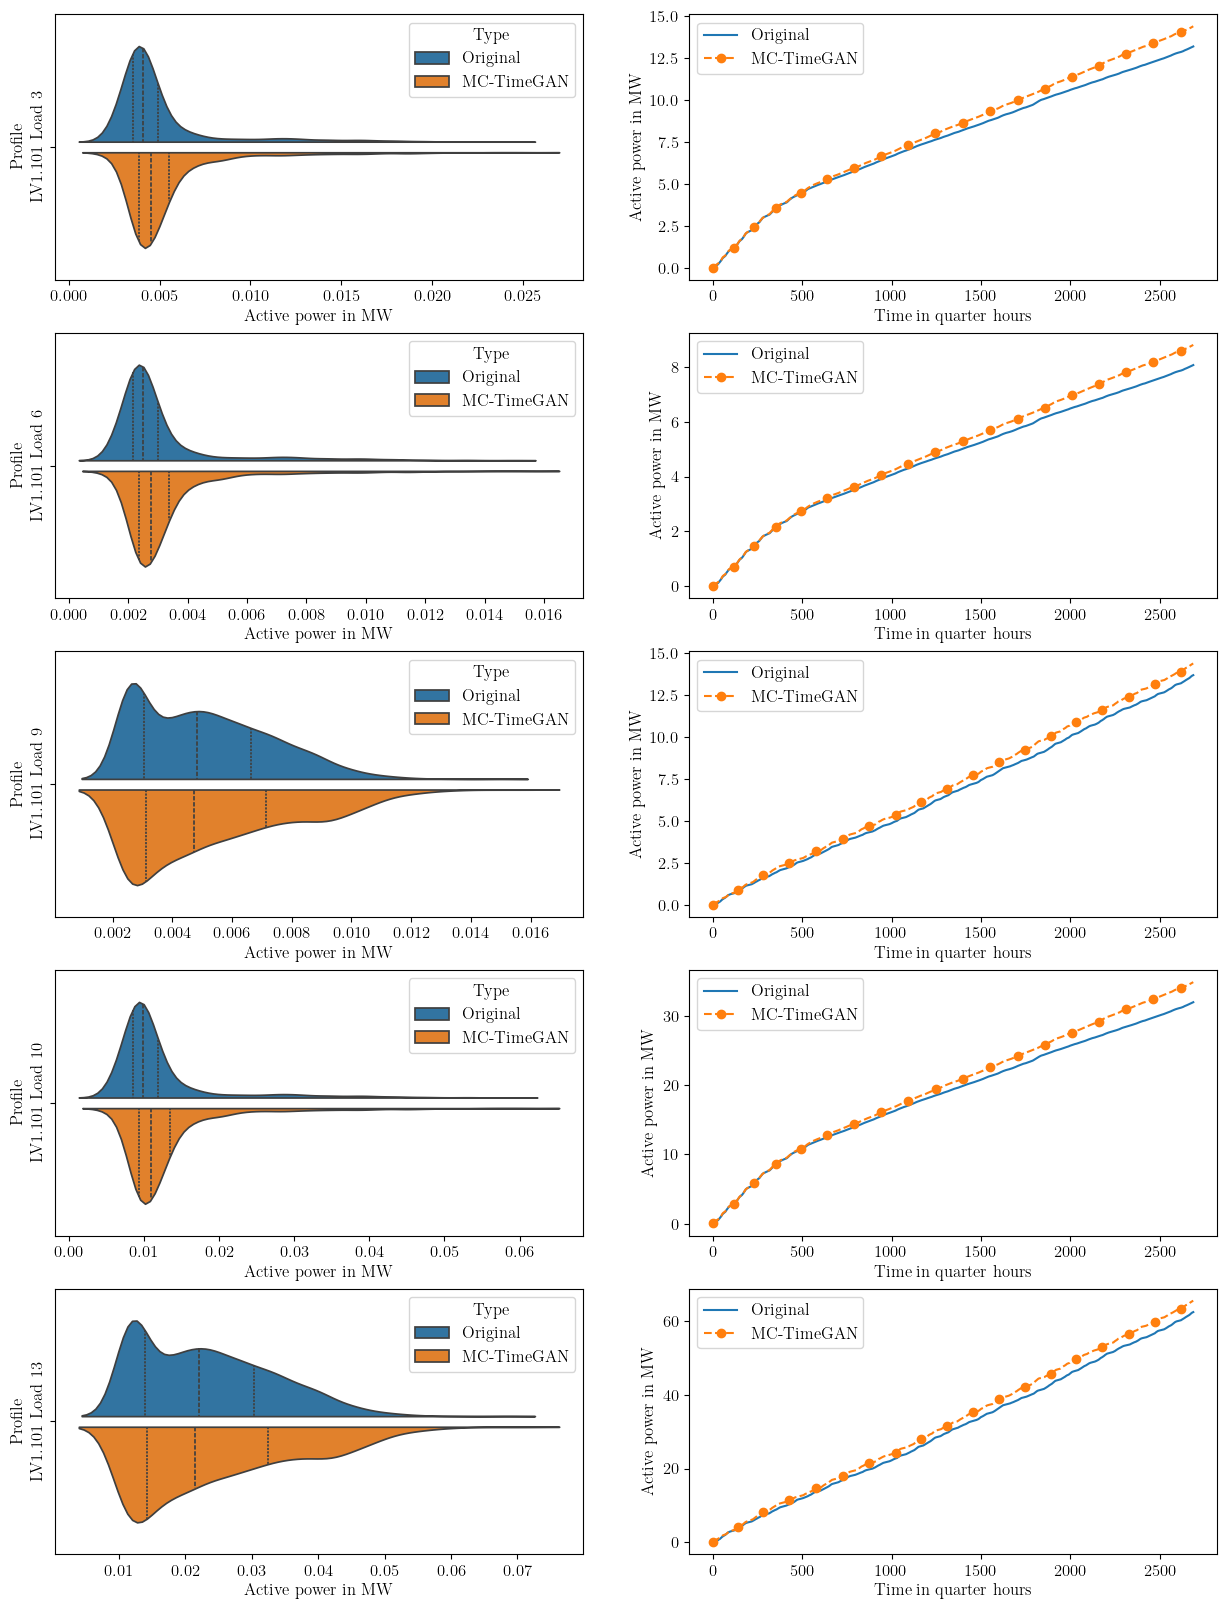

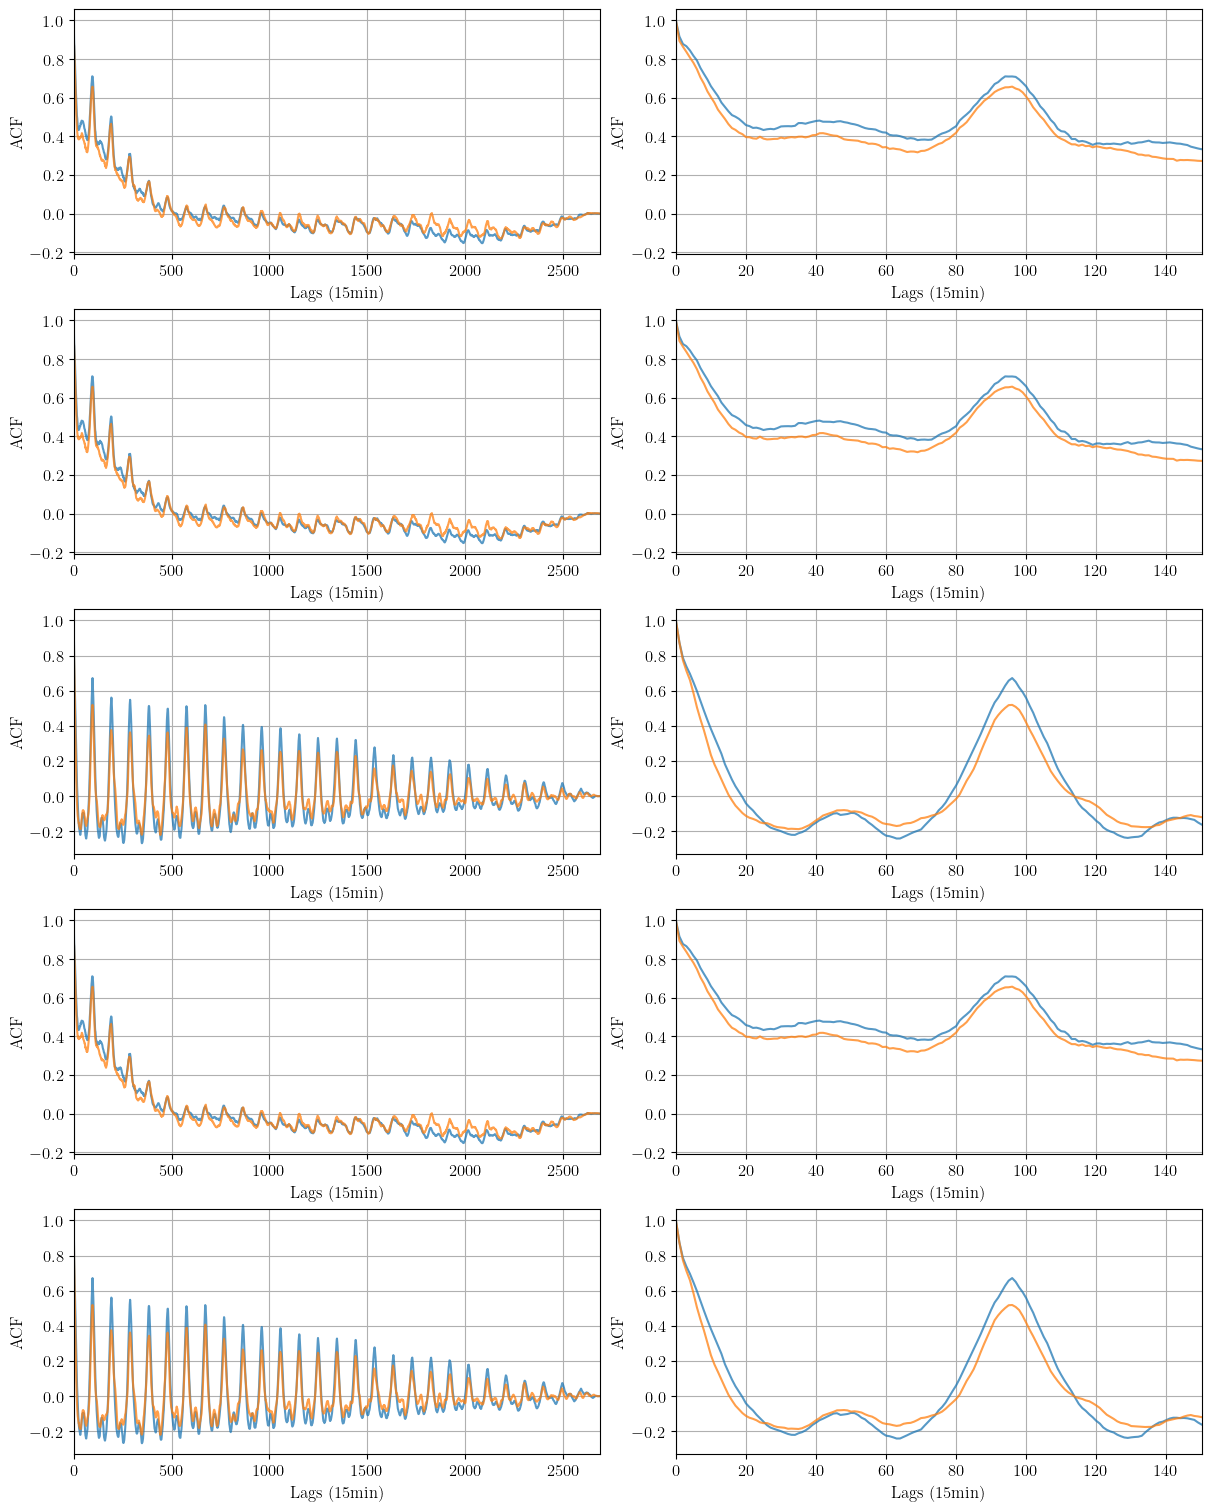

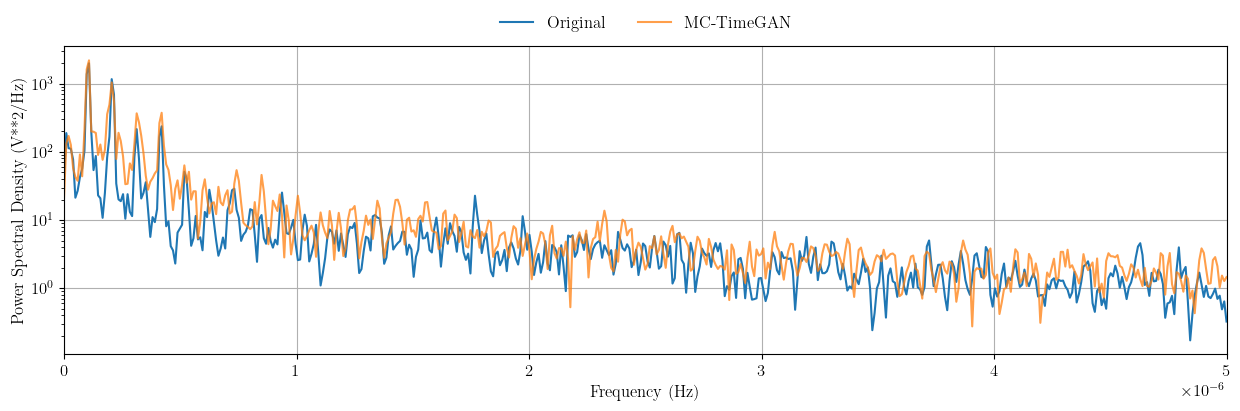

In [19]:
# Example usage:
eval.plot_cumsum(load_original, load_synthetic, yname='Load')
eval.plot_cumsum(sgen_original, sgen_synthetic, yname='Generation')
eval.plot_acf_and_pacf(load_original, load_synthetic)
eval.plot_acf_and_pacf(sgen_original, sgen_synthetic)
eval.plot_violin(res_line_original, res_line_synthetic)
eval.plot_profile_violin_and_cumsum(load_original, load_synthetic)
eval.plot_acf_comparison(load_original, load_synthetic)
eval.plot_psd(load_original, load_synthetic)

##### Conclusion

This concludes our tutorial on importing original data, generating its original and modified labels, and then integrating synthetic data with the modified data. The evaluation includes t-distributed Stochastic Neighbor Embedding (t-SNE) and Principal Component Analysis (PCA), power flow calculations, Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) assessments, and Power Spectral Density (PSD) analysis of both the original and MC-TimeGAN generated data.

In [20]:
# List all installed packages and save to requirements.txt
!pip freeze > requirements.txt